<a href="https://colab.research.google.com/github/eljc1995/jfk/blob/master/Binary_Classifier_JFK_Flights_Delay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JFK Flights - Delay prediction

Cuando solíamos viajar, un problema frecuente al llegar al aeropuerto era encontrarnos que nuestro vuelo se había retrasado. Este es también un grave problema para los controladores aereos que deben reprogramar los aterrizajes.

El departamento de transporte de Estados Unidos (USDT) nos ha contratado como expertos Data Scientist para ayudarles a mitigar este problema y nos han pedido que desarrollemos un modelo que permita predecir la probabilidad de que un vuelo se retrase.

Como primer ejercicio del módulo, vamos a desarrollar un modelo capaz de **predecir si un avión llegará al aeropuerto JFK de Nueva York con más de 15 minutos de retraso**.

In [ ]:
from IPython.display import Image
Image(url='https://nypost.com/wp-content/uploads/sites/2/2018/01/gettyimages-863832762.jpg?quality=80&strip=all&w=618&h=410&crop=1')  

Para ello, nos han proporcionado los datos de todos los vuelos con destino al aeropuerto JFK de Nueva York, que servirán para desarrollar un modelo piloto de predicción de retraso en los vuelos. Si este modelo es efectivo, USDT nos ha asegurado que contratará nuestros servicios para implantar el modelo a escala nacional!

## Importación de librerías 

En primer lugar, debemos importar las 4 librerías básicas utilizadas en Machine Learning: 
1. **Numpy**: soporte para vectores y matrices (numpy Arrays), sobre el que se apoya pandas
2. **Pandas**: soporte para Series y DataFrames y funciones de análisis de datos
3. **Matplotlib**: librería de gráficos sobre la que se apoya Seaborn y las funciones de visualización de pandas
4. **Seaborn**: librería de *easy ploting*

Aprovecharemos también para gestionar la visualización en linea (*%matplotlib inline*), los estilos gráficos (*plot style: ggplot*) y la visualización de pandas (*max_rows* y *format*).

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format

También cargaremos todas las funciones de preprocesamientoo de scikit-learn, contenidas en el **scikit preprocessing**.

In [ ]:
from sklearn import preprocessing

Y aprovecharemos para comprobar la **versión instalada de scikit-learn**.

In [ ]:
from sklearn import __version__ as sklearn_version
print('La versión instalada de scikit-learn es {}.'.format(sklearn_version))

La versión instalada de scikit-learn es 1.0.2.


## Importación de datos 

Antes de empezar a repasar la Machine Learning Checklist, importatemos el DataSet de trabajo (**JFKFlights**). Este Dataset se encuentra publicado en la página oficial del Departamento de transporte de Estados Unidos , aunque para facilitar el trabajo lo hemos trasladado a un link de descarga en internet (repositorio público en GitHub).

In [ ]:
url1 = 'https://bit.ly/3bf6QNP'

In [ ]:
url2 = 'https://bit.ly/3kLR2p3'

Recordad que para consultar cualquier método, en Jupyter podemos utilizar los accesores "?" y "??", que muestran en una nueva ventana la documentación que haya escrita y el código cuando éste no es privado.

In [ ]:
pd.read_csv?

In [ ]:
df1 = pd.read_csv(url1,index_col=0)

In [ ]:
df1.head()

,FL_DATE,OP_CARRIER_AIRLINE_ID,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,TAXI_OUT,CRS_ARR_TIME,ARR_DEL15,CRS_ELAPSED_TIME,DISTANCE
0,2018-02-01,"20,363.00",N299PQ,BNA,"Nashville, TN",Tennessee,JFK,"New York, NY",New York,1359,27.00,1719,0.00,140.00,765.00
1,2018-02-01,"20,363.00",N920XJ,RDU,"Raleigh/Durham, NC",North Carolina,JFK,"New York, NY",New York,1354,37.00,1541,0.00,107.00,427.00
2,2018-02-01,"20,363.00",N605LR,BUF,"Buffalo, NY",New York,JFK,"New York, NY",New York,1529,21.00,1709,0.00,100.00,301.00
3,2018-02-01,"20,363.00",N800AY,ORF,"Norfolk, VA",Virginia,JFK,"New York, NY",New York,1704,36.00,1845,0.00,101.00,290.00
4,2018-02-01,"20,363.00",N600LR,BOS,"Boston, MA",Massachusetts,JFK,"New York, NY",New York,1325,20.00,1454,0.00,89.00,187.00


In [ ]:
%%time
df2 = pd.read_csv(url2, index_col = 0)

CPU times: user 412 ms, sys: 64.1 ms, total: 476 ms
Wall time: 1.7 s


In [ ]:
df2.head()

,FL_DATE,OP_CARRIER_AIRLINE_ID,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,TAXI_OUT,CRS_ARR_TIME,ARR_DEL15,CRS_ELAPSED_TIME,DISTANCE
100000,2019-08-23,"20,363.00",N605LR,IND,"Indianapolis, IN",Indiana,JFK,"New York, NY",New York,1922,13.00,2145,0.00,143.00,665.00
100001,2019-08-23,"20,363.00",N604LR,BNA,"Nashville, TN",Tennessee,JFK,"New York, NY",New York,1031,NaN,1415,0.00,164.00,765.00
100002,2019-08-23,"20,363.00",N601LR,PIT,"Pittsburgh, PA",Pennsylvania,JFK,"New York, NY",New York,1718,18.00,1854,0.00,96.00,340.00
100003,2019-08-23,"19,805.00",N857NN,PHX,"Phoenix, AZ",Arizona,JFK,"New York, NY",New York,1218,22.00,2029,0.00,311.00,"2,153.00"
100004,2019-08-23,"20,398.00",N852AE,PIT,"Pittsburgh, PA",Pennsylvania,JFK,"New York, NY",New York,1401,11.00,1544,0.00,103.00,340.00


In [ ]:
df = df1.append(df2)

In [ ]:
df.head()

,FL_DATE,OP_CARRIER_AIRLINE_ID,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,TAXI_OUT,CRS_ARR_TIME,ARR_DEL15,CRS_ELAPSED_TIME,DISTANCE
0,2018-02-01,"20,363.00",N299PQ,BNA,"Nashville, TN",Tennessee,JFK,"New York, NY",New York,1359,27.00,1719,0.00,140.00,765.00
1,2018-02-01,"20,363.00",N920XJ,RDU,"Raleigh/Durham, NC",North Carolina,JFK,"New York, NY",New York,1354,37.00,1541,0.00,107.00,427.00
2,2018-02-01,"20,363.00",N605LR,BUF,"Buffalo, NY",New York,JFK,"New York, NY",New York,1529,21.00,1709,0.00,100.00,301.00
3,2018-02-01,"20,363.00",N800AY,ORF,"Norfolk, VA",Virginia,JFK,"New York, NY",New York,1704,36.00,1845,0.00,101.00,290.00
4,2018-02-01,"20,363.00",N600LR,BOS,"Boston, MA",Massachusetts,JFK,"New York, NY",New York,1325,20.00,1454,0.00,89.00,187.00


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
OP_CARRIER_AIRLINE_ID,"237,644.00","20,152.00",297.88,"19,690.00","19,790.00","20,363.00","20,409.00","21,171.00"
CRS_DEP_TIME,"250,152.00","1,334.61",529.10,3.00,915.00,"1,258.00","1,744.00","2,359.00"
TAXI_OUT,"232,641.00",18.19,9.61,1.00,12.00,16.00,21.00,166.00
CRS_ARR_TIME,"250,152.00","1,419.13",580.99,1.00,944.00,"1,455.00","1,914.00","2,400.00"
ARR_DEL15,"250,152.00",0.21,0.41,0.00,0.00,0.00,0.00,1.00
CRS_ELAPSED_TIME,"250,152.00",195.65,97.37,47.00,109.00,167.00,306.00,595.00
DISTANCE,"250,152.00","1,258.84",898.12,94.00,427.00,"1,028.00","2,248.00","4,983.00"


In [ ]:
df.reset_index(drop = True, inplace = True)

Ahora que tenemos los datos cargados, es el momento de empezar el análisis exploratorio.

## MLC2: Data Understanding

### MLC2.1: Análisis Univariante de datos

#### 1. Tamaño del dataset

Al introducir en un DataFrame los datos del csv, disponemos de todos los métodos y funciones disponibles en este tipo de objetos, que incluyen estadísticos descriptivos, funciones de visualización y otras. Podéis consultar todos los métodos (funciones) y atributos (parámetros) dispnibles en el objeto DataFrame en https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html. \
En concreto, podemos utilizar el método **df.info()** para consultar la información básica del dataset.

In [ ]:
df.info?

In [ ]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250152 entries, 0 to 250151
Columns: 15 entries, FL_DATE to DISTANCE
dtypes: float64(5), int64(2), object(8)
memory usage: 28.6+ MB


#### 2. Visualización directa de los datos

Igualmente, podemos consultar directamente los datos de la cabecera con **head()** o la cola con **tail()**.\
Como recomendación personal, es mejor visualizar los datos transpuestos, mediante el modificador **.T**.

In [ ]:
df.columns

Index(['FL_DATE', 'OP_CARRIER_AIRLINE_ID', 'TAIL_NUM', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_NM', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_NM', 'CRS_DEP_TIME', 'TAXI_OUT', 'CRS_ARR_TIME',
       'ARR_DEL15', 'CRS_ELAPSED_TIME', 'DISTANCE'],
      dtype='object')

In [ ]:
df.head(4).T

,0,1,2,3
FL_DATE,2018-02-01,2018-02-01,2018-02-01,2018-02-01
OP_CARRIER_AIRLINE_ID,"20,363.00","20,363.00","20,363.00","20,363.00"
TAIL_NUM,N299PQ,N920XJ,N605LR,N800AY
ORIGIN,BNA,RDU,BUF,ORF
ORIGIN_CITY_NAME,"Nashville, TN","Raleigh/Durham, NC","Buffalo, NY","Norfolk, VA"
ORIGIN_STATE_NM,Tennessee,North Carolina,New York,Virginia
DEST,JFK,JFK,JFK,JFK
DEST_CITY_NAME,"New York, NY","New York, NY","New York, NY","New York, NY"
DEST_STATE_NM,New York,New York,New York,New York
CRS_DEP_TIME,1359,1354,1529,1704


Un aspecto importante en el trabajo con datos es comprender la integridad del índice DataFrame. En este caso, cada registro corresponde a un vuelo determinado, un avión físico volando a una hora determinada de un día concreto. A este grupo (**FL_DATE-CRS_DEP_TIME-TAIL_NUM**) le llamaremos índice, y podemos explicitarlo en el Dataframe o no. 

A continuación se incluye la descripción de las variables:

* **FL_DATE**: Date of the observation
* **OP_CARRIER_AIRLINE_ID**: Identificador de la compañía aérea que opera el vuelo
* **TAIL_NUM**: Número de cola del avión, identificador único del avión
* **ORIGIN**: aeropuerto de origen
* **ORIGIN_CITY_NAME**: ciudad de origen
* **ORIGIN_STATE_NM**: estado (USA) de origen
* **DEST**: aeropuerto de destino, en este caso será siempre el JFK
* **DEST_CITY_NAME**: ciudad de destino, en este caso será siempre Nueva York
* **DEST_STATE_NM**: estado (USA) de destino, en este caso será siempre Nueva York
* **CRS_DEP_TIME**: hora prevista de salida
* **TAXI_OUT**: tiempo transcurrido entre la salida de la terminal y el despegue efectivo del avión
* **CRS_ARR_TIME**: hora prevista de llegada
* **ARR_DEL15**: booleana (1/0) indicando si el vuelo ha llegado con más de 15 minutos de retraso.
* **CRS_ELAPSED_TIME**: tiempo previsto de vuelo.
* **DISTANCE**: distancia entre aeropuertos

Deberemos elegir entre la variable **ARR_DELAY y ARR_DEL15** como predictivos, en este caso, como se trata de un modelo de clasificación, tomaremos como target la variable **ARR_DEL15**


In [ ]:
df.drop?

Al utilizar el método drop, es imporotante tener controlados 2 parámetros: 
1. **axis**: eje en el que debe buscar la variable que pasamos a eliminar (0 filas, 1 columnas). 
2. **inplace**: parámetro que indica si la variable debe eliminarse directamente. En caso de no especificar *inplace=1*, la aplicación del método imprimirá en pantalla un DataFrame sin esa variable, pero no realizará el borrado (puede utilizarse para asignar a un nuevo DataFrame la versión sin esa variable manteniendo el original). 


In [ ]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250152 entries, 0 to 250151
Columns: 15 entries, FL_DATE to DISTANCE
dtypes: float64(5), int64(2), object(8)
memory usage: 28.6+ MB


#### 3. Tipo de atributos disponibles

Un aspecto importante es tener controlado el tipo de atributos de nuestro dataframe (numéricos / categóricos).Esto se puede hacer mediante el método info(), especificando el parámetro *verbose = True* (versión larga del método). 

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250152 entries, 0 to 250151
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   FL_DATE                250152 non-null  object 
 1   OP_CARRIER_AIRLINE_ID  237644 non-null  float64
 2   TAIL_NUM               235143 non-null  object 
 3   ORIGIN                 250152 non-null  object 
 4   ORIGIN_CITY_NAME       250152 non-null  object 
 5   ORIGIN_STATE_NM        250152 non-null  object 
 6   DEST                   250152 non-null  object 
 7   DEST_CITY_NAME         250152 non-null  object 
 8   DEST_STATE_NM          250152 non-null  object 
 9   CRS_DEP_TIME           250152 non-null  int64  
 10  TAXI_OUT               232641 non-null  float64
 11  CRS_ARR_TIME           250152 non-null  int64  
 12  ARR_DEL15              250152 non-null  float64
 13  CRS_ELAPSED_TIME       250152 non-null  float64
 14  DISTANCE               250152 non-nu

#### 4. Estadísticos descriptivos

Una de las maneras más sencillas de comprender los atributos del DataFrame es el método **describe()**, que nos proporciona estadísticos representativos de cada uno de los atributos del DataFrame.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
OP_CARRIER_AIRLINE_ID,"237,644.00","20,152.00",297.88,"19,690.00","19,790.00","20,363.00","20,409.00","21,171.00"
CRS_DEP_TIME,"250,152.00","1,334.61",529.10,3.00,915.00,"1,258.00","1,744.00","2,359.00"
TAXI_OUT,"232,641.00",18.19,9.61,1.00,12.00,16.00,21.00,166.00
CRS_ARR_TIME,"250,152.00","1,419.13",580.99,1.00,944.00,"1,455.00","1,914.00","2,400.00"
ARR_DEL15,"250,152.00",0.21,0.41,0.00,0.00,0.00,0.00,1.00
CRS_ELAPSED_TIME,"250,152.00",195.65,97.37,47.00,109.00,167.00,306.00,595.00
DISTANCE,"250,152.00","1,258.84",898.12,94.00,427.00,"1,028.00","2,248.00","4,983.00"


Por defecto, cuando hay variables numéricas y categóricas, este método sólo describe las variables numéricas. Sin embargo, podemos modificarlo para mostrar también las variables categóricas.

In [ ]:
df.describe(include=['object']).T

,count,unique,top,freq
FL_DATE,250152,730,2018-07-19,394
TAIL_NUM,235143,2645,N110AN,761
ORIGIN,250152,72,LAX,25345
ORIGIN_CITY_NAME,250152,70,"Los Angeles, CA",25345
ORIGIN_STATE_NM,250152,32,California,51137
DEST,250152,1,JFK,250152
DEST_CITY_NAME,250152,1,"New York, NY",250152
DEST_STATE_NM,250152,1,New York,250152


Es bueno recordad que los DataFrames permiten la selección de parámetros mediante el método **select_dtypes()**. Si seleccionamos los atributos de tipo categórico e invocamos al método describe(), obtenemos el mismo resultado.

In [ ]:
df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
FL_DATE,250152,730,2018-07-19,394
TAIL_NUM,235143,2645,N110AN,761
ORIGIN,250152,72,LAX,25345
ORIGIN_CITY_NAME,250152,70,"Los Angeles, CA",25345
ORIGIN_STATE_NM,250152,32,California,51137
DEST,250152,1,JFK,250152
DEST_CITY_NAME,250152,1,"New York, NY",250152
DEST_STATE_NM,250152,1,New York,250152


#### 5. Número de valores nulos

Aunque en el método describe se pueden saber las variables que contienen valores nulos (resultados - count), pandas dispone del método **isnull()**, que genera una matriz indicando los valores nulos, sobre la que podemos aplicar el método sum para sumarlos y conocer el total. 

Es importante, siempre que podamos, trabajar por separado los atributos numéricos y categóricos para mantener una visión clara. 

In [ ]:
df.select_dtypes(include=['number']).isnull().sum()

OP_CARRIER_AIRLINE_ID    12508
CRS_DEP_TIME                 0
TAXI_OUT                 17511
CRS_ARR_TIME                 0
ARR_DEL15                    0
CRS_ELAPSED_TIME             0
DISTANCE                     0
dtype: int64

In [ ]:
df.select_dtypes(include=['object']).isnull().sum()

FL_DATE                 0
TAIL_NUM            15009
ORIGIN                  0
ORIGIN_CITY_NAME        0
ORIGIN_STATE_NM         0
DEST                    0
DEST_CITY_NAME          0
DEST_STATE_NM           0
dtype: int64

#### 6. Distribución de los valores del target

En los problemas de clasificación supervisada, uno de los aspectos clave a conocer es la distribución del target. En caso de un target categórico, debemos saber el valor y número de registros en cada categoría. Para esto, las Series de pandas disponen del método **value_counts()**.

In [ ]:
df['ARR_DEL15'].value_counts()

0.00    197520
1.00     52632
Name: ARR_DEL15, dtype: int64

Aquí es importante recordar que, a partir de un DataFrame, se pueden generar Series o DataFrames con el claudátor simple o doble. Por ejemplo: 

In [ ]:
print('Esto es un DataFrame')
print(type(df[['ARR_DEL15']]))
df[['ARR_DEL15']].head()

Esto es un DataFrame
<class 'pandas.core.frame.DataFrame'>


,ARR_DEL15
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00


In [ ]:
print('Esto es una Serie')
print(type(df['ARR_DEL15']))
df['ARR_DEL15'].head()

Esto es una Serie
<class 'pandas.core.series.Series'>


0   0.00
1   0.00
2   0.00
3   0.00
4   0.00
Name: ARR_DEL15, dtype: float64

Es importante conocer el tipo de datos con el que estamos trabajando, pues cada tipo de datos dispone de unos métodos determinados. El método value_counts, por ejemplo, sólo está disponible en las Series. 

Al llamar a value_counts, es importante usar el parámetro **dropna = False** para ver si hay valores nulos (en caso de que no lo hayamos hecho antes).

In [ ]:
df['ARR_DEL15'].value_counts(dropna=False)

0.00    197520
1.00     52632
Name: ARR_DEL15, dtype: int64

Asimismo, podemos utilizar el *easy plot* de Seaborn para obtener una visualización sencilla. 

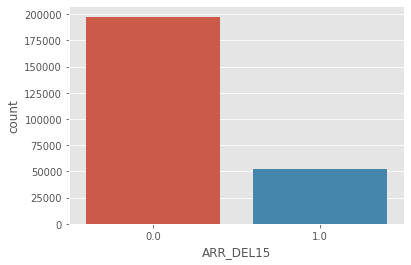

In [ ]:
sns.countplot(data=df, x='ARR_DEL15')

Vemos que el target contiene 2 valores en formato numérico: 
- ARR_DEL15 = 1
- ARR_DEL15 = 0 

Es aconsejable tener siempre el valor del target en una variable 0/1, para poder hacer agregaciones como las que veremos a continuación. 

Para realizar la conversión, es posible utilizar el operador de evaluación. En Python, cualquier cosa que incluyamos entre paréntesis **()** será evaluada, por lo que podemos incluir dentro de un paréntesis la evaluación de una igualdad (recordad, doble igual **==**) de manera que el paréntesis lo evalúe.\
Cuando la evaluación sea cierta, generará un valor booleano True, cuando no lo sea, generará un False.\
Al aplicar el método astype(int) al resultado de la evaluación, forzará la conversión **True->1** y **False->0**.

**Ejemplo en caso de que el target sea un string Yes, No**

In [ ]:
#df['ARR_DEL15'] = (df['ARR_DEL15'] == 'Yes').astype(int)

In [ ]:
#df[['ARR_DEL15']].head()

Como hemos comentado, el disponer de la clase en formato numérico nos permite hacer alguna operaciones interesantes.

Al hacer un **count** sobre la Serie de la clase, obtenemos el número total de valores (número de registros del DataFrame). 

In [ ]:
df['ARR_DEL15'].count()

250152

Con **sum**, obtenemos la suma. Como los negativos son 0 y los positivos 1, tendremos como resultado el número de ejemplos positivos.  

In [ ]:
df['ARR_DEL15'].sum()

52632.0

Igualmente, con **mean** obtendremos el número total de registros con 1 sobre el total, es decir, la ratio de prevalencia de la clase positiva.

In [ ]:
df['ARR_DEL15'].mean()

0.21040007675333397

#### 7 a 9. Distribución de variables y correlación con el target

Vamos a empezar la exploración de algunas variables. Con ello, haremos un repaso de métodos de pandas, matplotlib y seaborn. 

#### Exploramos las variables de fecha

Vamos a generar una muestra sobre el DataFrame original con los registros del aeropuerto LAX de Los Angeles, usando el **boolean indexing** (nos quedamos con registros que cumplan la coondición indicada).

In [ ]:
LAX_df = df[df['ORIGIN']=='LAX']

In [ ]:
LAX_df.head()

,FL_DATE,OP_CARRIER_AIRLINE_ID,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,TAXI_OUT,CRS_ARR_TIME,ARR_DEL15,CRS_ELAPSED_TIME,DISTANCE
34,2018-02-01,"19,805.00",N104NN,LAX,"Los Angeles, CA",California,JFK,"New York, NY",New York,1530,40.00,2359,1.00,329.00,"2,475.00"
35,2018-02-01,"19,805.00",N117AN,LAX,"Los Angeles, CA",California,JFK,"New York, NY",New York,1045,24.00,1919,0.00,334.00,"2,475.00"
36,2018-02-01,"19,805.00",N111ZM,LAX,"Los Angeles, CA",California,JFK,"New York, NY",New York,1630,36.00,59,0.00,329.00,"2,475.00"
39,2018-02-01,"19,805.00",N101NN,LAX,"Los Angeles, CA",California,JFK,"New York, NY",New York,1245,17.00,2123,0.00,338.00,"2,475.00"
100,2018-02-01,"19,790.00",NaN,LAX,"Los Angeles, CA",California,JFK,"New York, NY",New York,1130,27.00,2000,0.00,330.00,"2,475.00"


In [ ]:
LAX_df_dia = LAX_df[['FL_DATE','ARR_DEL15']].groupby(['FL_DATE']).mean()

El método groupby modifica automáticament el índice, asignando como índice la variable con la que hacemos el grouping, en este caso, la fecha ('FL_DATE'). Hay otro método que podemos utilizar para asignar una variable como índice:
df.set_index('FL_DATE', inplace=True).

Es muy útil asignar una fecha como índice para realizar gráficos.

In [ ]:
pd.DataFrame.plot?

In [ ]:
LAX_df_dia.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 2018-01-01 to 2019-12-31
Columns: 1 entries, ARR_DEL15 to ARR_DEL15
dtypes: float64(1)
memory usage: 11.4+ KB


Convertimos el indice del dataset en un indice datetime, lo que nos permitirá trabajar de forma mucho más sencilla para hacer summaries y plots

In [ ]:
LAX_df_dia.index = pd.to_datetime(LAX_df_dia.index)

Con este DataFrame reducido, podemos generar gráficos a partir del método **plot()** de las Series, accediendo con el claudátor simple. 

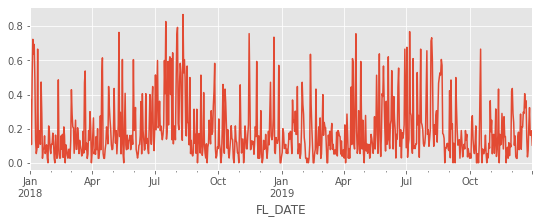

In [ ]:
plt.figure(figsize=[9,3])
LAX_df_dia['ARR_DEL15'].plot()

Extraemos la media semanal de retrasos en los vuelos, esto nos permitirá ver de forma más nitida si la serie tiene cierta estacionalidad

In [ ]:
media_retrasos_semanal = LAX_df_dia['ARR_DEL15'].resample('W').mean()

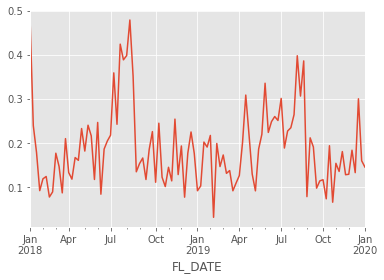

In [ ]:
media_retrasos_semanal.plot()

In [ ]:
media_retrasos_mensual = LAX_df_dia['ARR_DEL15'].resample('M').mean()

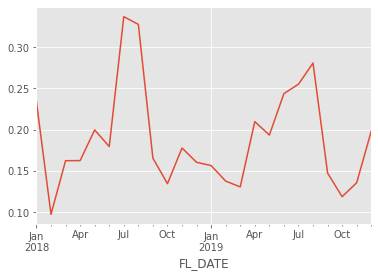

In [ ]:
media_retrasos_mensual.plot()

Observamos picks constantes en la proporción de vuelos con retraso. Sin embargo, vemos también que en ciertas épocas del año, sobretodo en verano se concentran mayores números de retrasos.

**Taxi out**

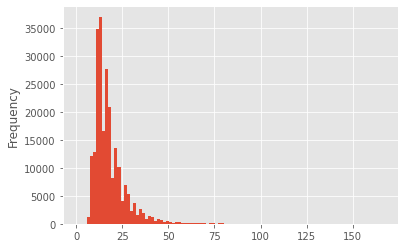

In [ ]:
df['TAXI_OUT'].plot(kind='hist', bins = 100)

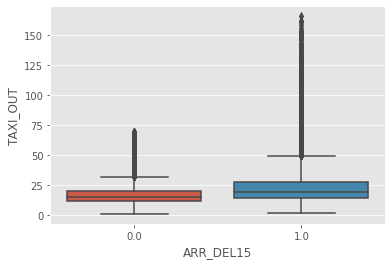

In [ ]:
sns.boxplot(data=df, x='ARR_DEL15', y='TAXI_OUT')

**Variable de hora de salida y llegada**

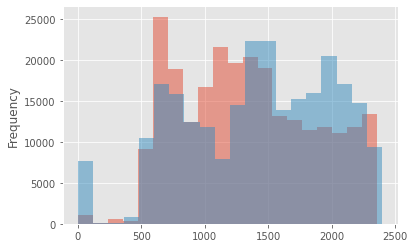

In [ ]:
df['CRS_DEP_TIME'].plot(kind='hist', alpha=.5, bins = 20)
df['CRS_ARR_TIME'].plot(kind='hist', alpha=.5, bins = 20)

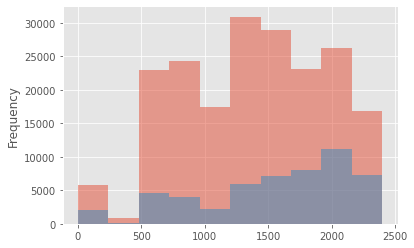

In [ ]:
df[df.ARR_DEL15 == 0]['CRS_ARR_TIME'].plot(kind='hist', alpha=.5)
df[df.ARR_DEL15 == 1]['CRS_ARR_TIME'].plot(kind='hist', alpha=.5)

Observamos que a última hora del día se acumulan un mayor número de vuelos con retraso. Es importante comprara este dato con el número total de vuelos a esa hora para sacar conclusiones correctas.

**Distancia**

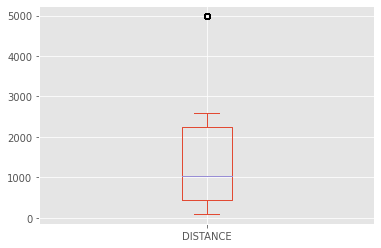

In [ ]:
df['DISTANCE'].plot(kind='box')

Como alternativa, podemos utilizar los métodos de seaborn, que nos permiten además mostrar de una manera muy sencilla gráficos combinados con varias variables. 

In [ ]:
sns.boxplot?

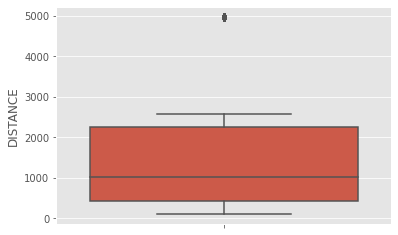

In [ ]:
sns.boxplot(data=df, y='DISTANCE')

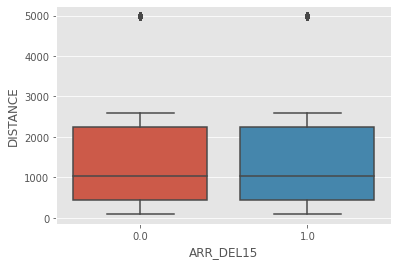

In [ ]:
sns.boxplot(data=df, x='ARR_DEL15', y='DISTANCE')

Con el gráfico violin plot podemos ver si la distribución de una variable cambia según el target.

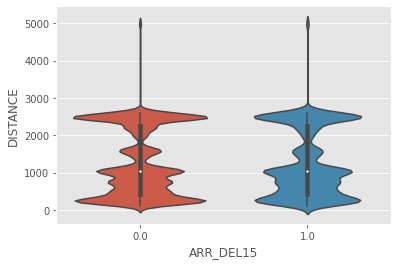

In [ ]:
sns.violinplot(data=df, x='ARR_DEL15', y='DISTANCE')

#### Estado de origen

Dentro de la mayoría de métodos de seaborn, el parámetro hue nos permite hacer un split por las categorías de esa variable (importante que sea categórica) para comparar distribuciones. 

In [ ]:
sns.countplot?

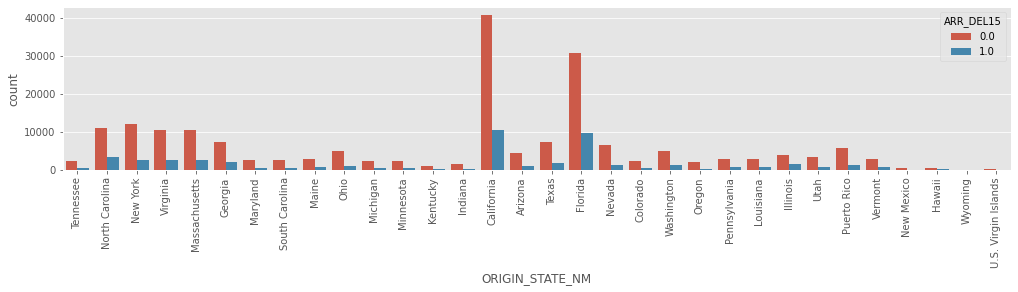

In [ ]:
plt.figure(figsize=[17,3])
plt.xticks(rotation=90)
sns.countplot(data=df, x='ORIGIN_STATE_NM', hue='ARR_DEL15')

Igualmente, podemos utilizar el método **pivot_table** del DataFrame para ver resultados agregados, utilizando los métodos de agregación sobre la clase vistos anteriormente. 

In [ ]:
df.pivot_table(index='ORIGIN_STATE_NM', values='ARR_DEL15', aggfunc=[len, sum, np.mean]).sort_values(by=[('mean','ARR_DEL15')], ascending = False)

,len,sum,mean
,ARR_DEL15,ARR_DEL15,ARR_DEL15
ORIGIN_STATE_NM,,,
Illinois,5647,"1,705.00",0.30
Hawaii,754,222.00,0.29
New Mexico,602,148.00,0.25
Wyoming,29,7.00,0.24
Florida,40488,"9,747.00",0.24
North Carolina,14434,"3,410.00",0.24
Georgia,9534,"2,059.00",0.22
Texas,9322,"2,012.00",0.22


O el método crosstab para conteos rápidos.

In [ ]:
pd.crosstab(df['ORIGIN_STATE_NM'], df['ARR_DEL15'])

ARR_DEL15,0.00,1.00
ORIGIN_STATE_NM,,
Arizona,4439,1021
California,40725,10412
Colorado,2492,580
Florida,30741,9747
Georgia,7475,2059
Hawaii,532,222
Illinois,3942,1705
Indiana,1716,370
Kentucky,1096,299


Podéis seguir explorando las variables de manera univariante o multivariante cogiendo ejemplo de los muchos NoteBooks disponibles en Kaggle, como por ejemplo este NoteBook de Titanic: https://www.kaggle.com/ash316/eda-to-prediction-dietanic

## MLC3: Data Preparation

### MLC3.1: Limpieza de atributos

#### Transformación de variables 

##### Númericas a categóricas

Los árboles de decisión necesitan siempre variables en formato numérico. Sin embargo, hay ocasiones en que las variables numéricas se nos presentan sin un sentido ordinal. Es por eso que debemos realizar una transformación de estas variables, para que sean tratadas como una variable categórica.

La variable OP_CARRIER_AIRLINE_ID tiene un formato numérico. Sin embargo, la variable no tiene ningún sentido ordinal, sinó que se refiere a un ID identificador de cada aerolinea. Por lo tanto, convertimos esta variable en una columna categórica. 

In [ ]:
df['AEROLINEA'] = df['OP_CARRIER_AIRLINE_ID'].astype(object)

NameError: ignored

In [ ]:
df.select_dtypes(include=['object']).describe().T

La variable Aerolinea nos aparece ahora con 11 registros únicos (11 aerolineas distintas), siendo la aerolinea con ID 20409 la más frecuente con 78775 vuelos operados.

Como ya hemos creado una variable categórica para la Aerolinea, podemos eliminar la variable origen con formato numérico

In [ ]:
df.drop('OP_CARRIER_AIRLINE_ID', axis=1, inplace=True)

#### Imputación de nulos 

##### Categóricas

El primer paso a realizar en cuanto a preparación de atributos es la Limpieza de nulos. Para ello, vamos a observar la cantidad de nulos que tenemos en variables numéricas y categóricas.

In [ ]:
df.select_dtypes(include=['object']).isnull().sum()

-> **Tail number**

Podéis ver que la variable Tail_NUM tiene 15009 nulos. Podemos ver la distribución de esta variable mediante value_counts. 

Esta variable contiene mucha información interesante. Por ejemplo:
* mediante fuentes de datos externas, podemos encontrar la fecha del primer vuelo del avión. 
* las dos últimas letras refieren a la aerolinea que está utilizando el avión
* la letra inicial se refiere al país en el que el avión está registrado. En este dataset son todos N (USA).

In [ ]:
df['TAIL_NUM'].value_counts(dropna=False)

In [ ]:
pd.DataFrame.fillna?

El método **fillna()** de pandas (para Series o DataFrames) permite llenar los nulos con valores específicos.\
Es importante, cuando utilicemos este método, recordar el parámetro inplace. 

En este caso, podríamos rellenarlo con el valor más común, o el valor más probable por Aerolinea. Sin embargo, la presencia de nulls puede contener información relevante para el modelo. Por tanto, es conveniente rellenar los nulos con un valor diferente al resto.

In [ ]:
df['TAIL_NUM'].fillna(value='ZZZ', inplace=True)

In [ ]:
df.select_dtypes(include=['object']).isnull().sum()

Al rellenar nulos de una variable categórica, hay que tener en cuenta que las variables categóricas se convierten en One Hot Encodings normalmente. Si creemos que los nulos pueden contener información relevante, rellenamos los nulos con un valor único. Si no queremos mantener esta información, no es necesario realizar ningún tratamiento de nulos, ya que al hacer el OHE simplemente no se creará una columna específica para ellos.

-> **Aerolinea**

In [ ]:
df['AEROLINEA'].fillna(value='ZZZ', inplace=True)

##### Numéricas

In [ ]:
df.select_dtypes(include=['number']).isnull().sum()

En las variables numéricas, podemos decidir rellenar los valores nulos con cualquier valor: 
1. Valores concretos
2. Valores medios o medianas (fillna lo soporta)

O bien podemos eliminar los registros que los contienen. En este caso, elegiremos un valor extremo, dado que vamos a trabajar con árboles. 

In [ ]:
df.fillna(value=-99999, inplace=True)

Y podemos visualizar el DataFrame resultante.

In [ ]:
df.head().T

#### Eliminación de atributos de baja varianza

En este dataset, encontramos tres variables sin varianza: DEST, DEST_CITY_NAME y DEST_STATE_NM, ya que todos los resgistros de vuelo tienen como destino el aeropuerto JFK de Nueva York. Las variables sin ninguna varianza no aportan información al modelo y por lo tanto se pueden eliminar.

In [ ]:
non_variance_features = ['DEST','DEST_CITY_NAME','DEST_STATE_NM']

In [ ]:
df.drop(non_variance_features, axis=1, inplace=True)

#### Variables de fecha

Vamos a convertir la variable Date en una fecha y obtener algunos nuevos atributos más fáciles de tratar en el modelo, como el número de mes o de año. 

In [ ]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

In [ ]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
df['Season'] = df['FL_DATE'].dt.quarter
df['Year'] = df['FL_DATE'].dt.year
df['Month'] = df['FL_DATE'].dt.month
df['Week'] = df['FL_DATE'].dt.week
df['Weekday'] = df['FL_DATE'].dt.weekday

Es importante revisar el orden con el que genera el día de la semana ya que por convención la semana puede empezar en lunes o en domingo. 

In [ ]:
df.head(1)

Hacemos un head del primer registro del dataset para checkear la fecha. El 1 de Diciembre de 2018 era Sábado que equivale al weeekday igual a 5. La semana empieza con 0 por lo tanto los valores 5 y 6 se corresponden al fin de semana.

In [ ]:
df['Weekday'].value_counts(dropna=False)

A partir del weekday podemos generar una nueva varibale de fin de semana. Mostramso al modelo de forma explícita que día son fin de semana. Estas tranformacionesson útiles si detectamos que, por ejemplo, se concentran más retrasos en fin de semana. Sin embargo, en este caso, al modelo le es indiferente trabajar con la variable Weekend igual a 1 o weekday mayor o igual que 5 (necesita un corte en ambos casos). Esta transformación puede ser útil si por ejemplo el domingo estan codificado como 0 y el sábado como un 6. En este caso, el árbol necesitaría dos cortes para discriminar los fines de semana.

In [ ]:
df['Weekend'] = (df['Weekday'] >= 5).astype(int)

In [ ]:
df.drop('FL_DATE', inplace=True, axis=1)

In [ ]:
df['Season'].head()

In [ ]:
df['Year'].head()

In [ ]:
df['Month'].head()

#### Tratamiento de variables categóricas

En cuanto a las variables categóricas, sobre aquellas variables con pocos registros distintos, podemos realizar un One Hot Encoding. Sin embargo, por problemas de memoria en el ordenador, debemos realizar algún tipo de tratamiento sobre el resto de variables con mayor número de registros distintos.

In [ ]:
df.select_dtypes(include=['object']).describe().T

Las variables Aerolinea, origen, ciudad de origen y estado de origen son candidatas a realizar un One hot encoding. En total nos generarán hasta 184 variables, ningú problema para el árbol de decisión y en principio manejable para todos los equipos. La variable Tail number tiene 2647 registros distintos que generarían 2647 columnas nuevas. Para valorar cómo tratar esta variable, es necesario hacer un análisis más exhaustivo.

**Análisis de tail number**

In [ ]:
df.pivot_table(index='TAIL_NUM', values='ARR_DEL15', aggfunc=[len, sum, np.mean]).sort_values(by=[('mean','ARR_DEL15')], ascending = False)

Si ordenamos el dataset según la proporción de retrasos que tiene cada matrícula de avión, observamos que tienen una mayor proporción aviones con pocos registros de vuelos. No es una estrategia efectiva para decidir cómo tratar la variable.

En estos casos, es más efectivo ordenar los registros según el número de veces que aparecen ya que pocos registros generará una variable con poca varianza al hacer el One Hot Encoding.

In [ ]:
df.pivot_table(index='TAIL_NUM', values='ARR_DEL15', aggfunc=[len, sum, np.mean]).sort_values(by=[('len','ARR_DEL15')], ascending = False)

Observamos que el número de avión con mayor número de registros es el N110AN con 759 registros. Esto representa tan solo un 0,3% del dataset. Realizar un OHE de esta variable aportará muy poca información al modelo. Por lo tanto, decidimos realizar un frequency encoding.

#### Frequency encoding de la variable Tail Number

Vamos a hacer un conteo de el número de vuelos que realiza cada avión y sustituiremos el valor del número de vuelos por cada avión correspondiente. Con esto conseguimos sustituir la variable categórica por una de numérica. Además, mantenemos cierta información del avión, el número de vuelos puede tener relación con la antigüedad y uso del avión. En consecuencia, aviones que se utilizan más podrían ser más propensos a sufrir averias. Esto son solo hipótesis, dejaremos después que el algoritmo decida si es una buena variable.

In [ ]:
df_tail_num = pd.DataFrame(df['TAIL_NUM'].value_counts(dropna = False))
df_tail_num.columns = ['TAIL_NUM_COUNT']
df_tail_num['TAIL_NUM'] = df_tail_num.index

In [ ]:
#Este es el dataframe que contiene el conteo de vuelos por avión
df_tail_num.head()

Hacemos el merge con el dataframe original

In [ ]:
df = df.merge(df_tail_num, on = 'TAIL_NUM')

In [ ]:
#podemos eliminar la variable original ya que es categórica y ya hemos hecho el tratamiento pertinente
df.drop('TAIL_NUM', axis = 1, inplace = True)

Sobre el resto de variables categóricas, podemos realizar un OHE que nos generará un total de 186 nuevas columnas.

In [ ]:
df.select_dtypes(include=['object']).describe().T

#### One-hot-encoding for ORIGIN

In [ ]:
_dummy_dataset = pd.get_dummies(df['ORIGIN'], prefix='ORIGIN')

In [ ]:
df = pd.concat([df,_dummy_dataset],axis=1)

In [ ]:
df.drop(['ORIGIN'],axis=1, inplace=True)

#### One-hot-encoding for CITY ORIGIN

In [ ]:
_dummy_dataset = pd.get_dummies(df['ORIGIN_CITY_NAME'], prefix='ORIGIN_CITY_NAME')

In [ ]:
df = pd.concat([df,_dummy_dataset],axis=1)

In [ ]:
df.drop(['ORIGIN_CITY_NAME'],axis=1, inplace=True)

#### One-hot-encoding for STATE ORIGIN

In [ ]:
_dummy_dataset = pd.get_dummies(df['ORIGIN_STATE_NM'], prefix='ORIGIN_STATE_NM')

In [ ]:
df = pd.concat([df,_dummy_dataset],axis=1)

In [ ]:
df.drop(['ORIGIN_STATE_NM'],axis=1, inplace=True)

#### One-hot-encoding for Aerolinea

In [ ]:
_dummy_dataset = pd.get_dummies(df['AEROLINEA'], prefix='AEROLINEA')

In [ ]:
df = pd.concat([df,_dummy_dataset],axis=1)

In [ ]:
df.drop(['AEROLINEA'],axis=1, inplace=True)

#### Resultado

Finalmente, visualizaremos el DataFrame resultante.

In [ ]:
df.head().T

In [ ]:
df.info(verbose=False)

## MLC4. Modelling

En este punto iniciamos con la fase de modelización, que ocupa los pasos de generación de la estrategia de validación, el entrenamiento del modelo y el desarrollo de predicciones y la validación de éstas. 

### MLC4.1: Train / Test Split

En primer lugar, importaremos los scikits de estrategias de validación y selección de modelos **model_selection** y métricas de validación **metrics**. 

In [ ]:
from sklearn import model_selection # model assesment and model selection strategies
from sklearn import metrics # model evaluation metrics

Podemos analizar los métodos disponibles con "??"

In [ ]:
model_selection??

Y vemos que disponemos de métodos para el random holdout (**train_test_split**) y k-fold (**KFold**), además de otras aproximaciones como el LeaveOneOut u otros. 

#### Generación de la partición de validación 

Como hemos comentado, este dataset está particinado temporalmente, de manera que tenemos un registro por fecha, hora y avión. En este tipo de casos, es adecuado guardar las particiones más recientes para hacer la validación del modelo, contrastando que nuestro modelo tiene capacidad de generalización hacia delante; aunque es de esperar que el patrón de comportamiento de los retrasos no tenga grandes variaciones en medida "año", es una buena práctica que se recomienda mantener y que será muy relevante en casos en los que el comportamiento a predecir evolucione en períodos breves de tiempo. 

Para ello, vamos a ver cuántos registros tenemos de cada año, y con esto estableceremos qué particiones queremos utilizar para validación.

In [ ]:
df['Year'].value_counts()

2018    125483
2019    124669
Name: Year, dtype: int64

De manera complementaria, podemos analizar la tasa en cada partición año-mes

In [ ]:
df.pivot_table(index=['Year','Month'], values='ARR_DEL15', aggfunc=[len, sum, np.mean])

len       sum      mean
           ARR_DEL15 ARR_DEL15 ARR_DEL15
Year Month                              
2018 1          9244  1,968.00      0.21
     2          9115  1,418.00      0.16
     3          9927  1,825.00      0.18
     4         10393  2,184.00      0.21
     5         10915  2,478.00      0.23
     6         11052  2,504.00      0.23
     7         11201  3,463.00      0.31
     8         11202  3,345.00      0.30
     9         10591  2,304.00      0.22
     10        10952  1,628.00      0.15
     11        10194  2,138.00      0.21
     12        10697  2,199.00      0.21
2019 1         10245  2,154.00      0.21
     2          9381  1,817.00      0.19
     3         11084  1,812.00      0.16
     4         10308  2,236.00      0.22
     5         10797  2,122.00      0.20
     6         10543  2,743.00      0.26
     7         10661  2,735.00      0.26
     8         10782  2,912.00      0.27
     9         10120  1,544.00      0.15
     10        10426  1,418.00      0.14
     11         9937  1,205.00      0.12
     12        10385  2,480.00      0.24

Para este caso, podemos por ejemplo validar con los últimos 6 meses de 2019 y utilizar 2018 y los 6 primeros de 2019 para realizar el entrenamiento del modelo (train y test). Para seleccionarlo, utilizaremos de nuevo el boolean indexing. 

In [ ]:
dev_df = df[(df['Year'] == 2018) | (df['Month'] < 7) ] # development = train + test
val_df = df[(df['Year'] == 2019) & (df['Month'] >= 7)] # validation

In [ ]:
dev_df.shape

(187841, 199)

In [ ]:
val_df.shape

(62311, 199)

Una vez realizada la selección de particiones, vamos a asignar los atributos y el target a las variables X e y, respectivamente.\
Para seleccionar, utilizaremos el método Drop sin el atributo inplace y haciendo asignación y la indexación directa (ojo con el doble claudator, usaremos un DataFrame... si usasemos el claudator simple sacaríamos una Serie).

In [ ]:
dev_df_X = dev_df.drop('ARR_DEL15', axis=1)
dev_df_y = dev_df[['ARR_DEL15']]

In [ ]:
val_df_X = val_df.drop('ARR_DEL15', axis=1)
val_df_y = val_df[['ARR_DEL15']]

In [ ]:
dev_df_X.head().T

,0,1,2,3,4
CRS_DEP_TIME,"1,359.00","1,021.00","1,325.00",600.00,"1,715.00"
TAXI_OUT,27.00,11.00,31.00,19.00,11.00
CRS_ARR_TIME,"1,719.00","1,158.00","1,454.00",711.00,"1,930.00"
CRS_ELAPSED_TIME,140.00,97.00,89.00,71.00,135.00
DISTANCE,765.00,340.00,187.00,94.00,636.00
Season,1.00,1.00,1.00,1.00,1.00
Year,"2,018.00","2,018.00","2,018.00","2,018.00","2,018.00"
Month,2.00,2.00,2.00,2.00,2.00
Week,5.00,5.00,6.00,6.00,6.00
Weekday,3.00,5.00,1.00,3.00,6.00


In [ ]:
dev_df_y.head().T

,0,1,2,3,4
ARR_DEL15,0.00,0.00,0.00,0.00,1.00


#### Random Holdout

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                        dev_df_X, # X 
                                        dev_df_y, # y
                                        test_size = 0.30, # tamaño del split aleatorio 
                                        random_state = 42
                                     )

In [ ]:
X_train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131488 entries, 207503 to 156518
Columns: 198 entries, CRS_DEP_TIME to AEROLINEA_ZZZ
dtypes: float64(3), int64(9), uint8(186)
memory usage: 36.4 MB


In [ ]:
X_test.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56353 entries, 91964 to 105925
Columns: 198 entries, CRS_DEP_TIME to AEROLINEA_ZZZ
dtypes: float64(3), int64(9), uint8(186)
memory usage: 15.6 MB


In [ ]:
X_train.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
CRS_DEP_TIME,"131,488.00","1,337.92",526.82,4.00,917.00,"1,300.00","1,745.00","2,359.00"
TAXI_OUT,"131,488.00","-7,089.16","25,697.67","-99,999.00",12.00,15.00,21.00,166.00
CRS_ARR_TIME,"131,488.00","1,418.96",579.74,1.00,939.00,"1,457.00","1,910.00","2,400.00"
CRS_ELAPSED_TIME,"131,488.00",195.14,97.35,47.00,108.00,167.00,306.00,595.00
DISTANCE,"131,488.00","1,254.49",897.90,94.00,427.00,"1,028.00","2,248.00","4,983.00"


In [ ]:
X_test.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
CRS_DEP_TIME,"56,353.00","1,335.12",525.68,3.00,915.00,"1,300.00","1,740.00","2,359.00"
TAXI_OUT,"56,353.00","-6,912.31","25,400.22","-99,999.00",12.00,15.00,21.00,154.00
CRS_ARR_TIME,"56,353.00","1,419.65",580.85,1.00,944.00,"1,457.00","1,912.00","2,400.00"
CRS_ELAPSED_TIME,"56,353.00",195.47,97.49,47.00,108.00,167.00,306.00,595.00
DISTANCE,"56,353.00","1,257.73",900.17,94.00,427.00,"1,028.00","2,248.00","4,983.00"


In [ ]:
y_train.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
ARR_DEL15,"131,488.00",0.21,0.41,0.00,0.00,0.00,0.00,1.00


In [ ]:
y_test.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
ARR_DEL15,"56,353.00",0.21,0.41,0.00,0.00,0.00,0.00,1.00


### MLC4.2: Model definition

En primer lugar, será necesario importar los scikits de modelización

#### Import scikits

In [ ]:
!conda install python-graphviz -y

/bin/bash: conda: command not found


Para visualizar árboles, es importante tener instalado la librería graphviz

!conda install graphviz -y

In [ ]:
!conda install pydot -y

/bin/bash: conda: command not found


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
DecisionTreeClassifier?

A continuación, y para entrenar el modelo utilizaremos siempre el mismo procedimiento
- Instanciar el modelo (definir los parámetros)
- Realizar el entrenamiento (inducción de las reglas concretas a partir de los datos)
- Predecir (calcular la probabilidad de retraso sobre un dataset nuevo, test, que nos permita medir la bonanza del modelo)

In [ ]:
dt = DecisionTreeClassifier(
                        # criterion='gini',
                        # splitter='best',
                        max_depth=4, # Importante, regulará el sobreajuste
                        # min_samples_split=2,
                        # min_samples_leaf=1,
                        # min_weight_fraction_leaf=0.0,
                        # max_features=None,
                        random_state=42,
                        # max_leaf_nodes=None,
                        # min_impurity_decrease=0.0,
                        # min_impurity_split=None,
                        # class_weight=None,
                        # presort=False,  
                )

In [ ]:
dt.fit?

In [ ]:
dt.fit(
    X=X_train, 
    y=y_train, 
    # sample_weight=None, 
    # check_input=True, 
    # X_idx_sorted=None
)

DecisionTreeClassifier(max_depth=4, random_state=42)

Una vez generado el árbol, podemos pasar a visualizarlo con export_graphviz.

In [ ]:
export_graphviz?

In [ ]:
dot_data = export_graphviz(
                        decision_tree = dt,
                        out_file=None,
                        # max_depth=None,
                        feature_names=X_test.columns,
                        class_names=['No delay', 'Delay'],
                        # label='all',
                        filled=True,
                        # leaves_parallel=False,
                        impurity=True,
                        # node_ids=False,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        # special_characters=False,
                        precision=4,
                        )

In [ ]:
graph = graphviz.Source(dot_data)
graph

De la lectura del árbol se ve que la variable más relevante es TAXI_OUT . Cuando toma valores mayores a 34.5, la probabilidad de delay pasa de un 21.48% a un 61.87%, y esto aplica para el 5.3% de los ejemplos. Si es mayor a 50.5%, la probabilidad pasa al 89.89%. 

Podemos hacer un análisis unidimensional de esta variable con las técnicas que hemos visto antes. 

In [ ]:
df_taxi_out_not_null = df[(df['TAXI_OUT'] >= 0)]

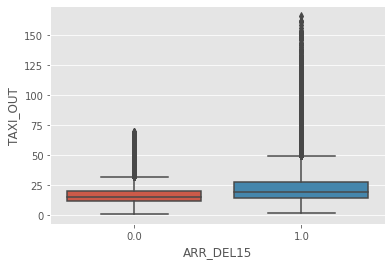

In [ ]:
sns.boxplot(data=df_taxi_out_not_null, x='ARR_DEL15', y='TAXI_OUT' )

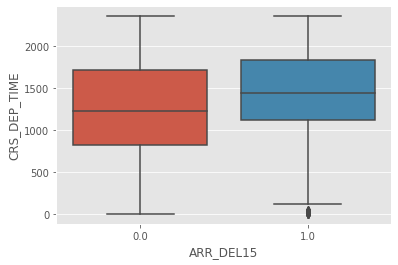

In [ ]:
sns.boxplot(data=df, x='ARR_DEL15', y='CRS_DEP_TIME' )

### MLC4.3: Model evaluation

#### Opción 1: a través de los resultados

In [ ]:
y_test_pred = pd.DataFrame(dt.predict(X_test), index=y_test.index, columns=['DelayPrediction'])

In [ ]:
y_test_pred.head()

,DelayPrediction
91964,1.00
205250,0.00
156190,0.00
117192,0.00
33706,0.00


In [ ]:
y_test.head()

,ARR_DEL15
91964,1.00
205250,1.00
156190,0.00
117192,0.00
33706,0.00


In [ ]:
y_test.shape

(56353, 1)

In [ ]:
y_test_pred.shape

(56353, 1)

In [ ]:
results_df = y_test.join(y_test_pred, how= 'inner')

In [ ]:
results_df['Success'] = (results_df['ARR_DEL15'] == results_df['DelayPrediction']).astype(int)

In [ ]:
results_df.head(20)

,ARR_DEL15,DelayPrediction,Success
91964,1.00,1.00,1
205250,1.00,0.00,0
156190,0.00,0.00,1
117192,0.00,0.00,1
33706,0.00,0.00,1
82783,1.00,0.00,0
75723,1.00,0.00,0
92264,1.00,1.00,1
78746,0.00,0.00,1
180918,0.00,0.00,1


In [ ]:
results_df['Success'].count()

56353

In [ ]:
results_df['Success'].sum()

45147

In [ ]:
results_df['Success'].mean()

0.8011463453587209

In [ ]:
print('Hemos acertado {} registros de un total de {}, por tanto el Accuracy es {}.'.format(results_df['Success'].sum(), results_df['Success'].count(), results_df['Success'].mean()))

Hemos acertado 45147 registros de un total de 56353, por tanto el Accuracy es 0.8011463453587209.


#### Opción 2: a través de la matriz de confusión

In [ ]:
confusion_matrix = pd.crosstab(results_df['ARR_DEL15'], results_df['DelayPrediction'])

In [ ]:
confusion_matrix

DelayPrediction,0.00,1.00
ARR_DEL15,,
0.00,43705,559
1.00,10647,1442


In [ ]:
TP = confusion_matrix.iloc[1,1]
TN = confusion_matrix.iloc[0,0]
FP = confusion_matrix.iloc[0,1]
FN = confusion_matrix.iloc[1,0]

In [ ]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.8011463453587209

#### Opción 3: Usando el módulo metrics

In [ ]:
metrics.accuracy_score(results_df['ARR_DEL15'], results_df['DelayPrediction'])

0.8011463453587209

#### Opción 4: Usando el modelo

In [ ]:
dt.score(X_test, y_test)

0.8011463453587209

Normalmente, usaremos esta forma (el score del modelo) por comodidad, pero es bueno ser capaces de generar los distintos métodos para obtener la puntuación para ver otros casos (por ejemplo, que tal han validado las días según mes) (No somos Noob, somos Pro). 

#### Validación por mes

In [ ]:
results_df.head().T

,91964,205250,156190,117192,33706
ARR_DEL15,1.00,1.00,0.00,0.00,0.00
DelayPrediction,1.00,0.00,0.00,0.00,0.00
Success,1.00,0.00,1.00,1.00,1.00


In [ ]:
results_df['Year'] = X_test['Year']

In [ ]:
results_df['Month'] = X_test['Month']

In [ ]:
results_df.head()

,ARR_DEL15,DelayPrediction,Success,Year,Month
91964,1.00,1.00,1,2018,2
205250,1.00,0.00,0,2018,12
156190,0.00,0.00,1,2018,10
117192,0.00,0.00,1,2018,12
33706,0.00,0.00,1,2019,3


In [ ]:
results_df.pivot_table(index=['Year', 'Month'], values='Success', aggfunc=[len, sum, np.mean])

len     sum    mean
           Success Success Success
Year Month                        
2018 1        2796    2222    0.79
     2        2694    2319    0.86
     3        2900    2402    0.83
     4        3132    2515    0.80
     5        3245    2568    0.79
     6        3356    2595    0.77
     7        3327    2365    0.71
     8        3444    2507    0.73
     9        3155    2545    0.81
     10       3300    2849    0.86
     11       3042    2499    0.82
     12       3196    2576    0.81
2019 1        3117    2532    0.81
     2        2814    2328    0.83
     3        3315    2802    0.85
     4        3065    2452    0.80
     5        3305    2716    0.82
     6        3150    2355    0.75

#### Otro elemento interesante es evaluar el modelo de forma probabilista, obteniendo los scorings y no el valor de predicción

In [ ]:
y_score = pd.DataFrame(dt.predict_proba(X_test)[:,1], index=y_test.index, columns=['DelayScore'])

In [ ]:
results_df = results_df.join(y_score)

In [ ]:
results_df.head(10)

,ARR_DEL15,DelayPrediction,Success,Year,Month,DelayScore
91964,1.00,1.00,1,2018,2,0.80
205250,1.00,0.00,0,2018,12,0.10
156190,0.00,0.00,1,2018,10,0.21
117192,0.00,0.00,1,2018,12,0.17
33706,0.00,0.00,1,2019,3,0.21
82783,1.00,0.00,0,2019,1,0.29
75723,1.00,0.00,0,2018,5,0.21
92264,1.00,1.00,1,2018,5,0.94
78746,0.00,0.00,1,2018,2,0.29
180918,0.00,0.00,1,2019,4,0.17


In [ ]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56353 entries, 91964 to 105925
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ARR_DEL15        56353 non-null  float64
 1   DelayPrediction  56353 non-null  float64
 2   Success          56353 non-null  int64  
 3   Year             56353 non-null  int64  
 4   Month            56353 non-null  int64  
 5   DelayScore       56353 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 5.0 MB


In [ ]:
results_df.pivot_table(index='DelayScore', values='Success', aggfunc=[len, sum, np.mean])

,len,sum,mean
,Success,Success,Success
DelayScore,,,
0.10,13426,12134,0.90
0.17,17707,14645,0.83
0.21,11042,8777,0.79
0.22,595,465,0.78
0.29,1218,867,0.71
0.29,5161,3632,0.70
0.30,309,227,0.73
0.32,1954,1322,0.68


In [ ]:
results_by_score = results_df.pivot_table(index='DelayScore', values='Success', aggfunc=[len, sum, np.mean])

In [ ]:
results_by_score.columns = ['Count', 'Sum', 'Mean']

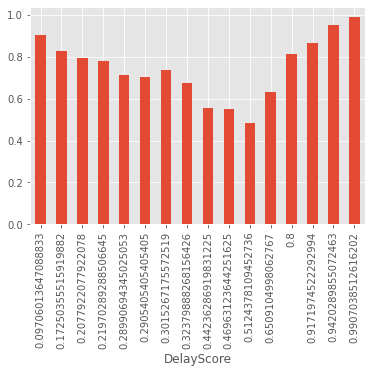

In [ ]:
results_by_score['Mean'].plot(kind='bar')

#### Prueba de diversas estrategias de validación

Vamos a probar distintas estrategias de parámetros

In [ ]:
for i in range(1, 20):
    dt = DecisionTreeClassifier(max_depth=i, random_state=42)
    dt.fit(X_train, y_train)
    train_accuracy = dt.score(X_train, y_train)
    test_accuracy = dt.score(X_test, y_test)
    print('Profundidad del árbol: {}. Train: {} - Test: {}'.format(i, train_accuracy, test_accuracy))

Profundidad del árbol: 1. Train: 0.7984835118033585 - Test: 0.7979167036360088
Profundidad del árbol: 2. Train: 0.7984835118033585 - Test: 0.7979167036360088
Profundidad del árbol: 3. Train: 0.8007802993429058 - Test: 0.8005962415488084
Profundidad del árbol: 4. Train: 0.8012822462886348 - Test: 0.8011463453587209
Profundidad del árbol: 5. Train: 0.8020123509369677 - Test: 0.8016254680318705
Profundidad del árbol: 6. Train: 0.803921270382088 - Test: 0.8032402888932266
Profundidad del árbol: 7. Train: 0.8057997688001947 - Test: 0.8036306851454226
Profundidad del árbol: 8. Train: 0.8094959235823801 - Test: 0.8038436285557113
Profundidad del árbol: 9. Train: 0.8130399732294963 - Test: 0.8035774492928505
Profundidad del árbol: 10. Train: 0.8170707593088342 - Test: 0.804642166344294
Profundidad del árbol: 11. Train: 0.8223792285227549 - Test: 0.803541958724469
Profundidad del árbol: 12. Train: 0.82888172304697 - Test: 0.8026901850833141
Profundidad del árbol: 13. Train: 0.8369128741786322 -

En este ejemplo, podemos ver claramente como el árbol hace Overfit a medida que incrementamos la profundidad, y es por este motivo que tendremos que recurrir a mecanismos de **poda**

In [ ]:
DecisionTreeClassifier??

#### Vamos a probar con algún parámetro para ver como modifican el sobreajuste.


In [ ]:
for i in range(1, 20):
    dt = DecisionTreeClassifier(max_depth=i, random_state=42, min_samples_split=500)
    dt.fit(X_train, y_train)
    train_accuracy = dt.score(X_train, y_train)
    test_accuracy = dt.score(X_test, y_test)
    print('Profundidad del árbol: {}. Train: {} - Test: {}'.format(i, train_accuracy, test_accuracy))

Profundidad del árbol: 1. Train: 0.7984835118033585 - Test: 0.7979167036360088
Profundidad del árbol: 2. Train: 0.7984835118033585 - Test: 0.7979167036360088
Profundidad del árbol: 3. Train: 0.8007802993429058 - Test: 0.8005962415488084
Profundidad del árbol: 4. Train: 0.8012822462886348 - Test: 0.8011463453587209
Profundidad del árbol: 5. Train: 0.8017765879776101 - Test: 0.8013592887690096
Profundidad del árbol: 6. Train: 0.8031455341932343 - Test: 0.8027256756516956
Profundidad del árbol: 7. Train: 0.8046361645169141 - Test: 0.8031160719038916
Profundidad del árbol: 8. Train: 0.8069937941104892 - Test: 0.8030983266197008
Profundidad del árbol: 9. Train: 0.8078303723533706 - Test: 0.8025482228097883
Profundidad del árbol: 10. Train: 0.8084996349476758 - Test: 0.8035597040086597
Profundidad del árbol: 11. Train: 0.8090091871501582 - Test: 0.8039323549766649
Profundidad del árbol: 12. Train: 0.8091080554879533 - Test: 0.8038436285557113
Profundidad del árbol: 13. Train: 0.8092069238257

#### Podemos medir la efectividad en el conjunto de validación del mejor estimador

In [ ]:
dt = DecisionTreeClassifier(max_depth=11, random_state=42, min_samples_split=500)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11, min_samples_split=500, random_state=42)

In [ ]:
dt.score(X_train, y_train)

0.8090091871501582

In [ ]:
dt.score(X_test, y_test)

0.8039323549766649

In [ ]:
dt.score(val_df_X, val_df_y)

0.8092953090144597

#### Podemos evaluar otras opciones de métrica como el F1

In [ ]:
confusion_matrix

DelayPrediction,0.00,1.00
ARR_DEL15,,
0.00,43705,559
1.00,10647,1442


In [ ]:
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)

In [ ]:
f1_score = 2 / ( 1/Precision + 1/Recall )

In [ ]:
f1_score

0.20468417317246274

In [ ]:
metrics.f1_score(y_test, y_test_pred)

0.20468417317246274

#### O la curva de ROC

In [ ]:
print(metrics.roc_auc_score(results_df['ARR_DEL15'], results_df['DelayScore']))

0.6795882513669739


In [ ]:
fpr, tpr, _ = metrics.roc_curve(results_df['ARR_DEL15'], results_df['DelayScore'])

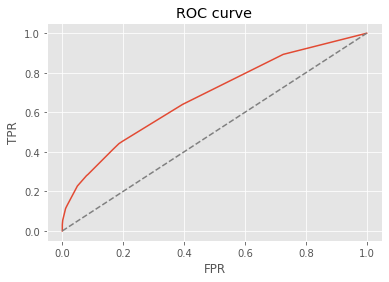

In [ ]:
plt.clf()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

#### Podemos probar el k-fold como estrategia de validación

In [ ]:
kf = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)

In [ ]:
scores_list = []
for train_index, test_index in kf.split(dev_df):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = dev_df_X.iloc[train_index], dev_df_X.iloc[test_index]
    y_train, y_test = dev_df_y.iloc[train_index], dev_df_y.iloc[test_index]
    dt = DecisionTreeClassifier(max_depth=8, random_state=42)
    dt.fit(X_train, y_train)
    _score = dt.score(X_test, y_test)
    scores_list.append(_score)
    #print(_scores)
scores_list

[0.7996273622571201,
 0.8051000851788757,
 0.8055792163543442,
 0.8033965076660988,
 0.8003087734241908,
 0.8054727427597955,
 0.7981260647359455,
 0.803822402044293,
 0.8042482964224872,
 0.8039821124361158]

In [ ]:
np.mean(scores_list)

0.8029663563279266

In [ ]:
np.std(scores_list)

0.0025078842792880026

In [ ]:
dt = DecisionTreeClassifier(max_depth=8, random_state=42)

In [ ]:
scores = model_selection.cross_val_score(dt, dev_df_X, dev_df_y, cv=kf)

In [ ]:
scores

array([0.79962736, 0.80510009, 0.80557922, 0.80339651, 0.80030877,
       0.80547274, 0.79812606, 0.8038224 , 0.8042483 , 0.80398211])

In [ ]:
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.803 (+/- 0.005)


### Evaluación de modelos alternativos

Una alternativa al uso de árboles de decisión que aporta mayor precisión sin perjudicar la capacidad de generalización son los modelos de Ensamble, como Random Forest o Gradient Boosting

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
RandomForestClassifier??

In [ ]:
rf = RandomForestClassifier(n_estimators=3, max_depth=5, random_state=42)

In [ ]:
rf.fit(
    X=X_train, 
    y=np.ravel(y_train)
)

RandomForestClassifier(max_depth=5, n_estimators=3, random_state=42)

El Random Forest genera un listado de estimadores (los modelos de base) consultable, de manera que podemos trabajar con cada uno de éstos como si se tratase de un modelo independiente.

In [ ]:
tree_list = rf.estimators_

In [ ]:
tree_list

[DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1608637542),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1273642419),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1935803228)]

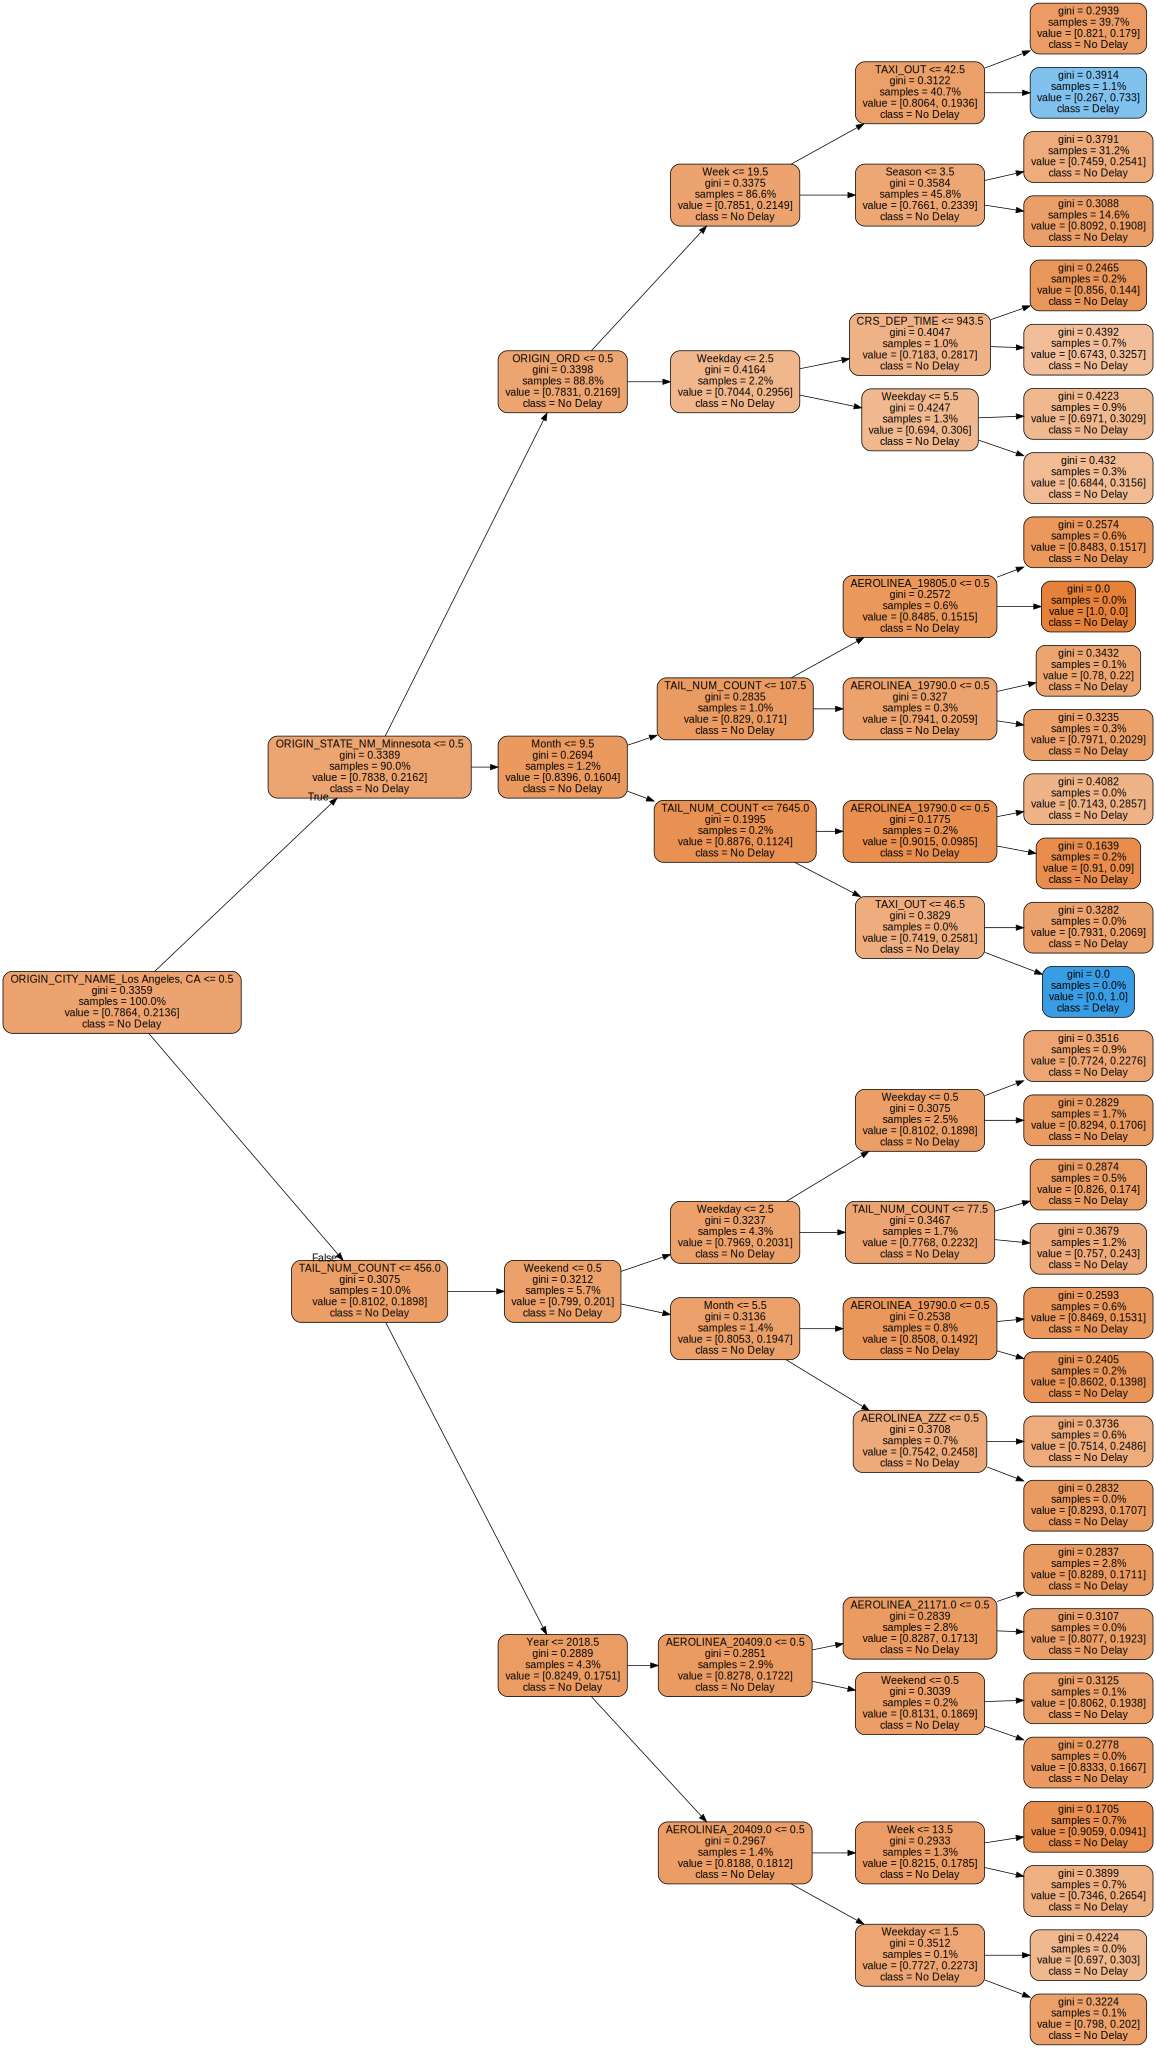

<Figure size 576x576 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,8))
dot_data = export_graphviz(
                        decision_tree = tree_list[0],
                        out_file=None,
                        feature_names=X_test.columns,
                        class_names=['No Delay', 'Delay'],
                        filled=True,
                        impurity=True,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        precision=4,
                        )

graph = graphviz.Source(dot_data)
graph

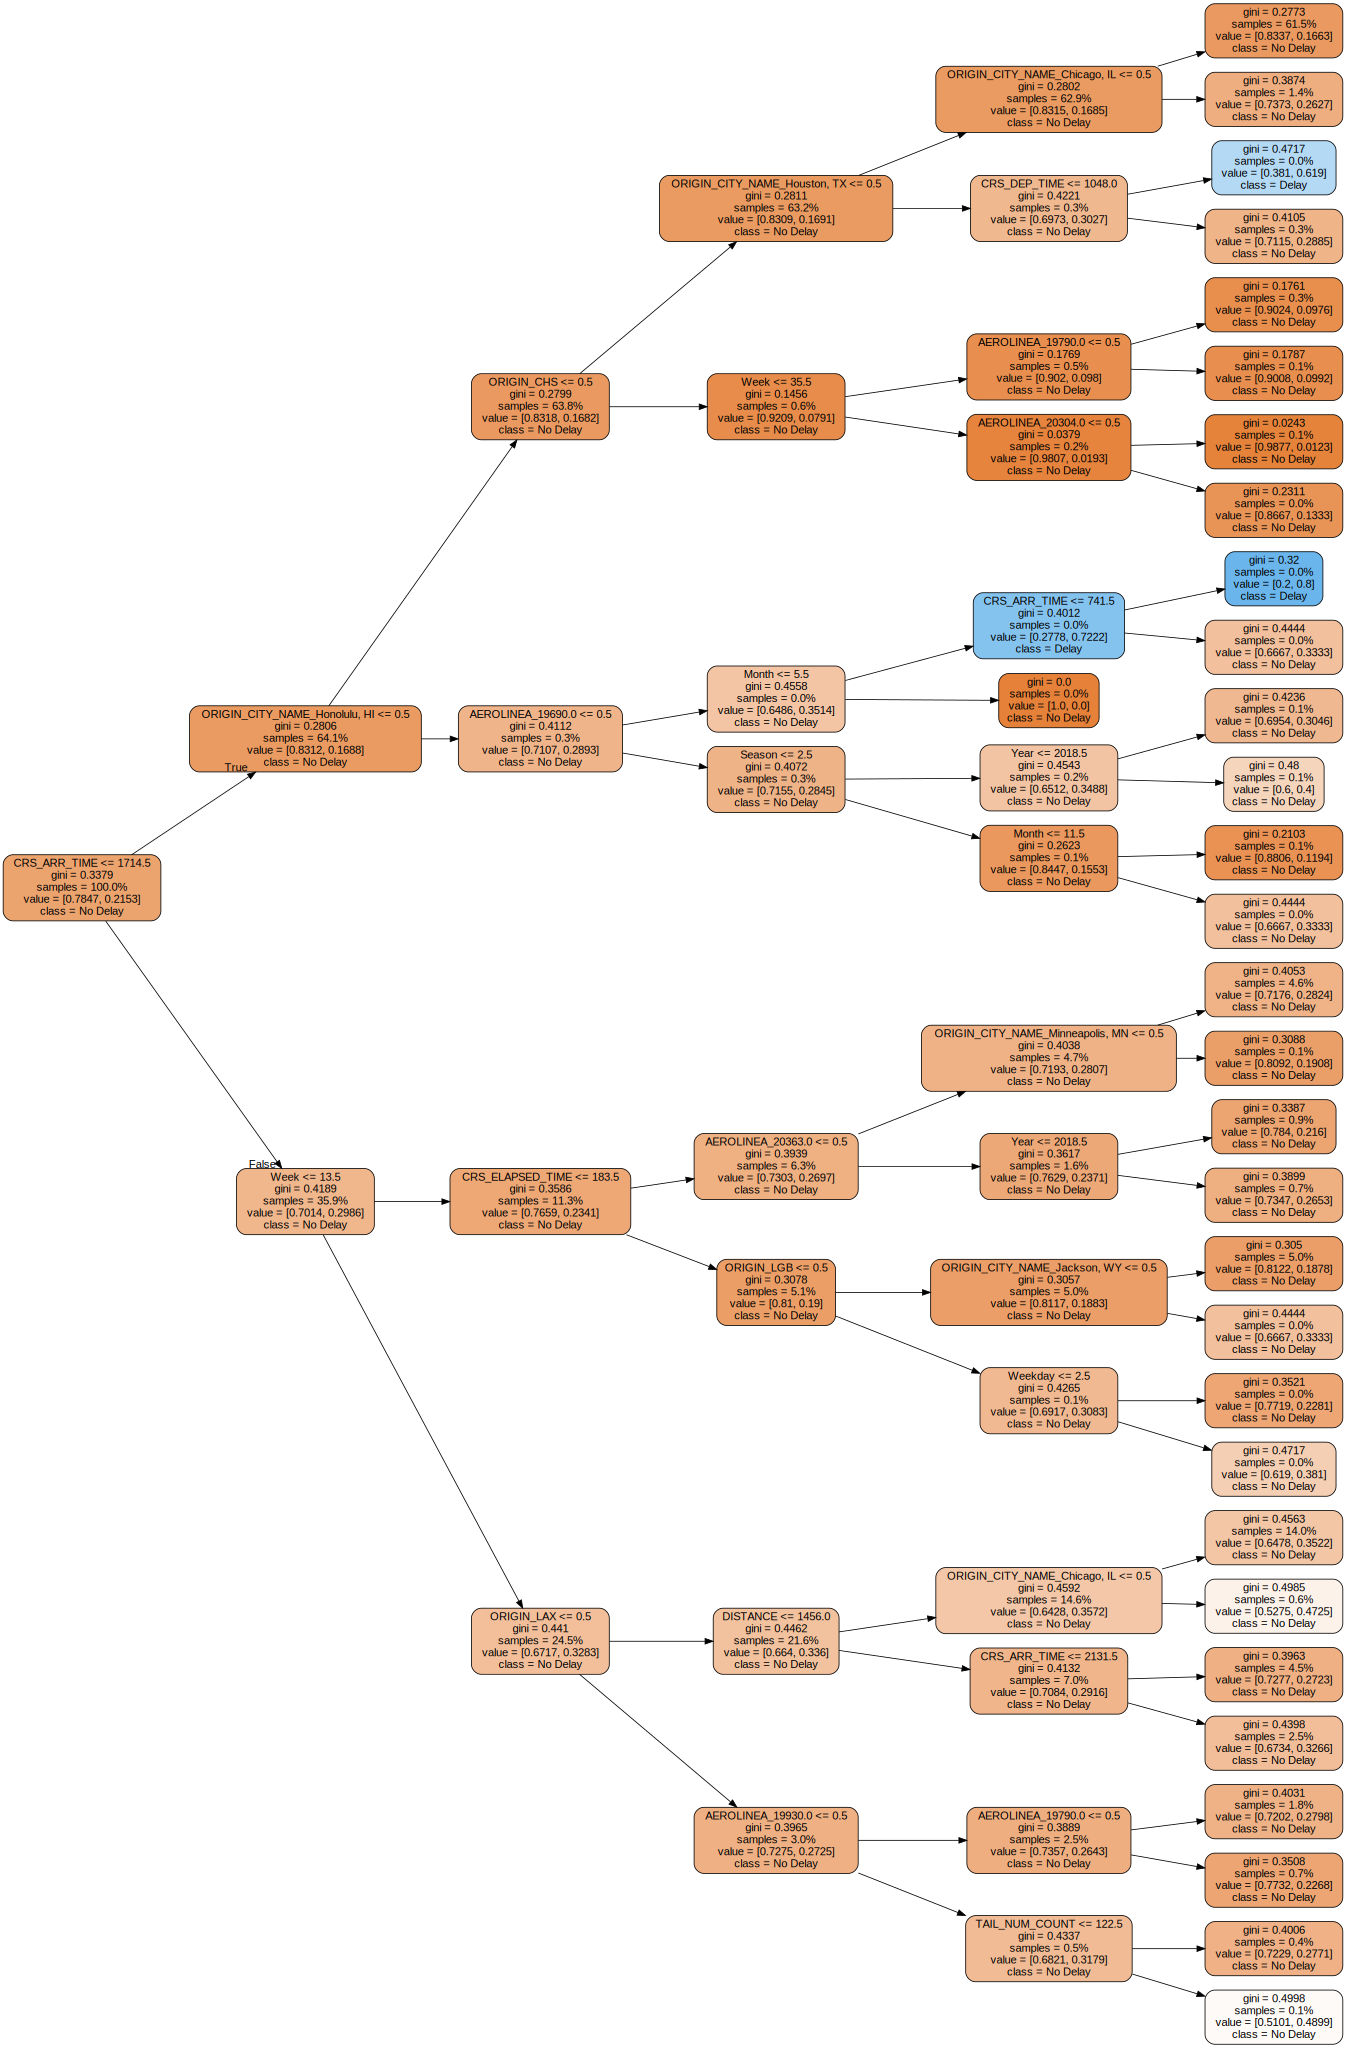

In [ ]:
dot_data = export_graphviz(
                        decision_tree = tree_list[1],
                        out_file=None,
                        feature_names=X_test.columns,
                        class_names=['No Delay', 'Delay'],
                        filled=True,
                        impurity=True,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        precision=4,
                        )

graph = graphviz.Source(dot_data)
graph

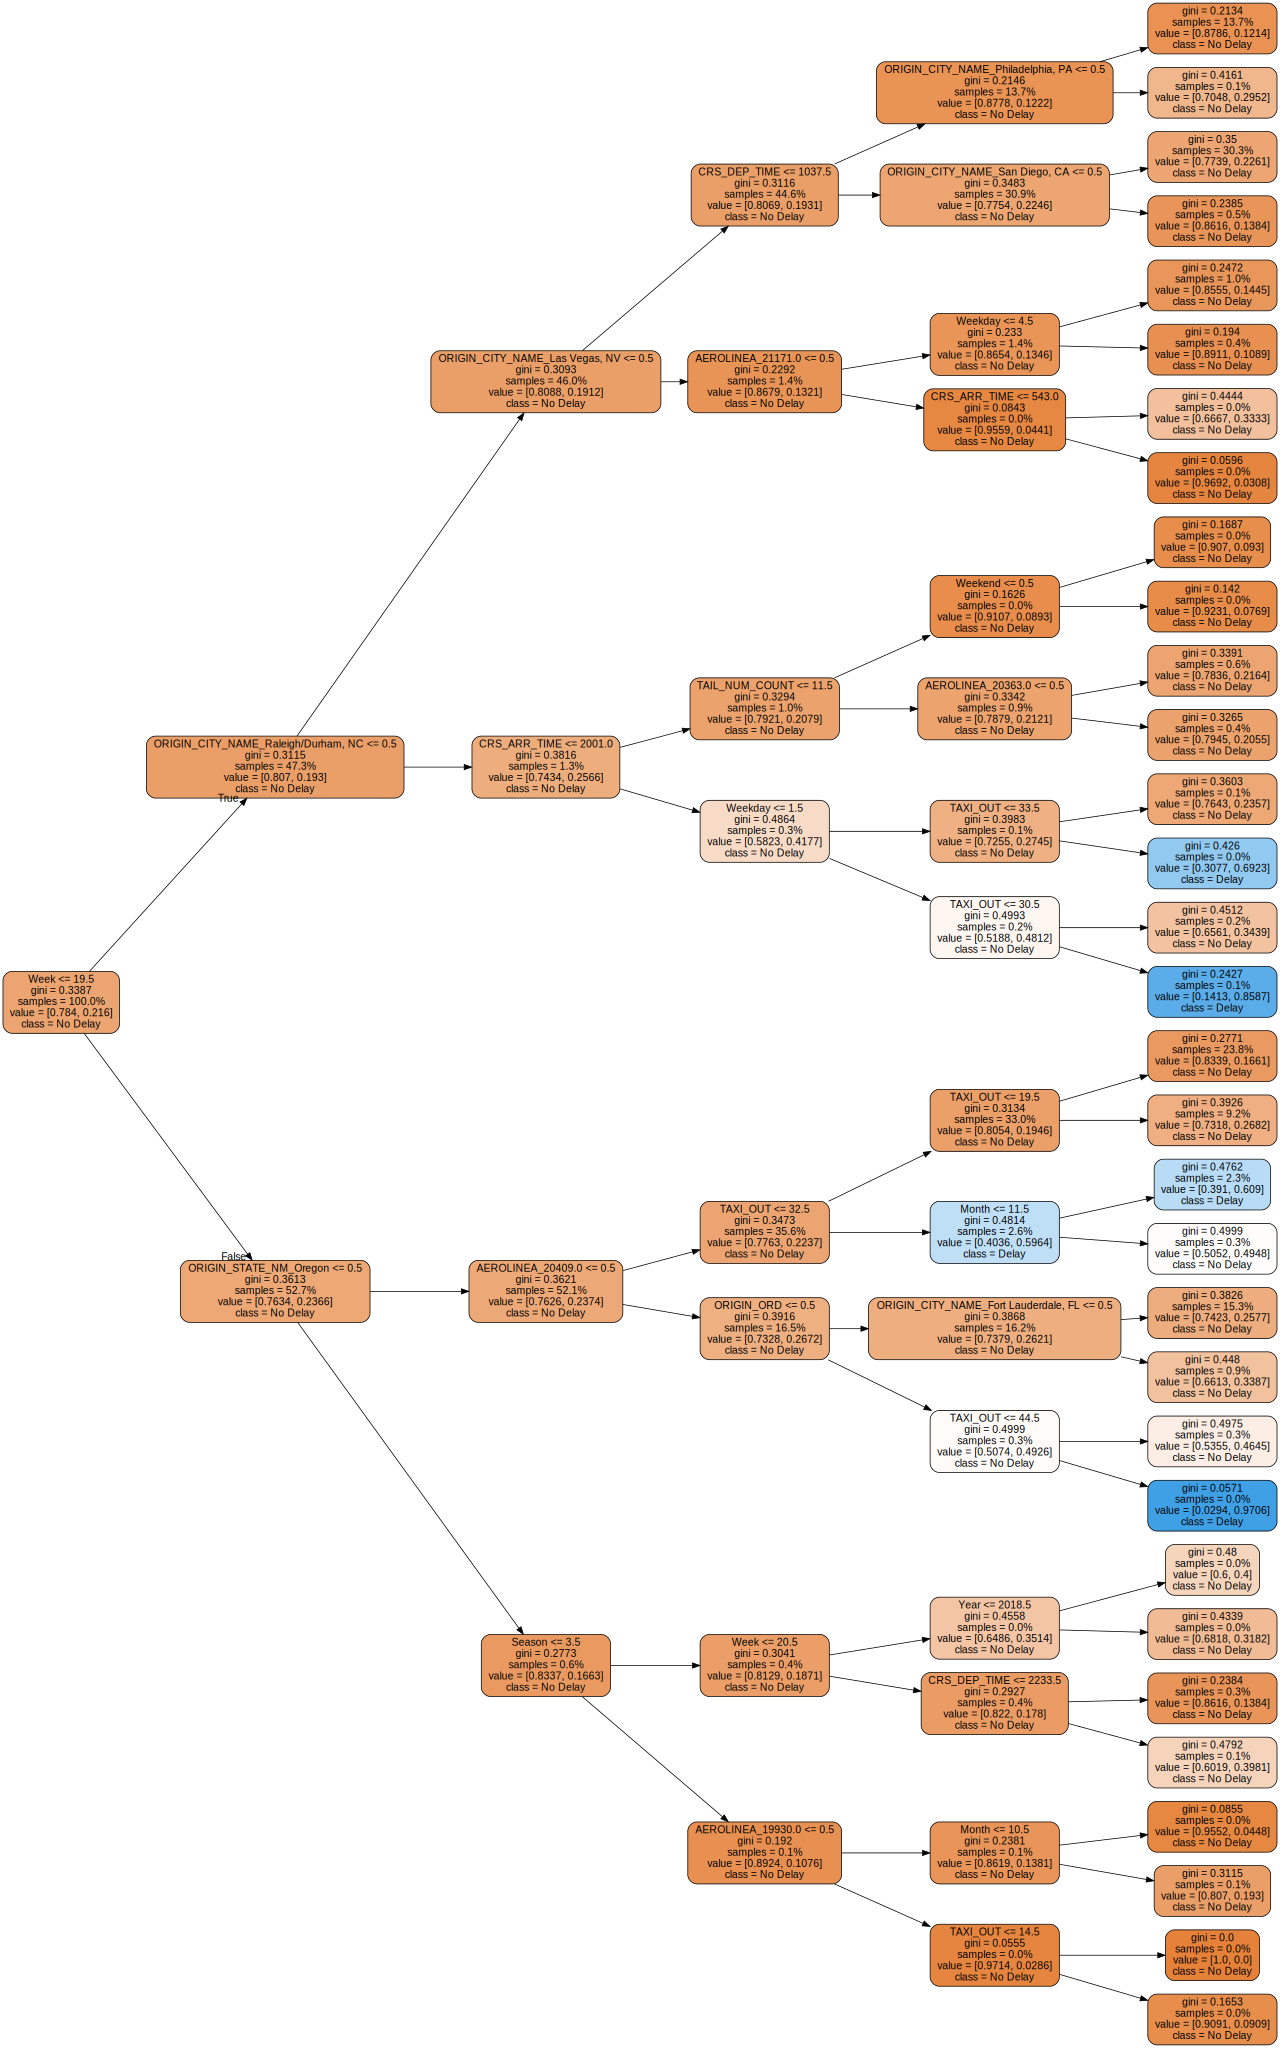

In [ ]:
dot_data = export_graphviz(
                        decision_tree = tree_list[2],
                        out_file=None,
                        feature_names=X_test.columns,
                        class_names=['No Delay', 'Delay'],
                        filled=True,
                        impurity=True,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        precision=4,
                        )

graph = graphviz.Source(dot_data)
graph

Una alternativa a la visualización de importancia de atributos es el Feature Importance, que promedia el Information Gain del predictor en todo el ensamble. 

In [ ]:
top_features = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(20)

In [ ]:
top_features

TAXI_OUT                               0.46
CRS_ARR_TIME                           0.24
Week                                   0.10
CRS_DEP_TIME                           0.05
Season                                 0.03
ORIGIN_ORD                             0.02
ORIGIN_CITY_NAME_Chicago, IL           0.01
DISTANCE                               0.01
CRS_ELAPSED_TIME                       0.01
AEROLINEA_20409.0                      0.01
Month                                  0.01
ORIGIN_LAX                             0.01
TAIL_NUM_COUNT                         0.01
ORIGIN_CITY_NAME_Los Angeles, CA       0.00
Weekday                                0.00
ORIGIN_CITY_NAME_Houston, TX           0.00
ORIGIN_CHS                             0.00
ORIGIN_STATE_NM_Minnesota              0.00
ORIGIN_CITY_NAME_Honolulu, HI          0.00
ORIGIN_CITY_NAME_Fort Lauderdale, FL   0.00
dtype: float64

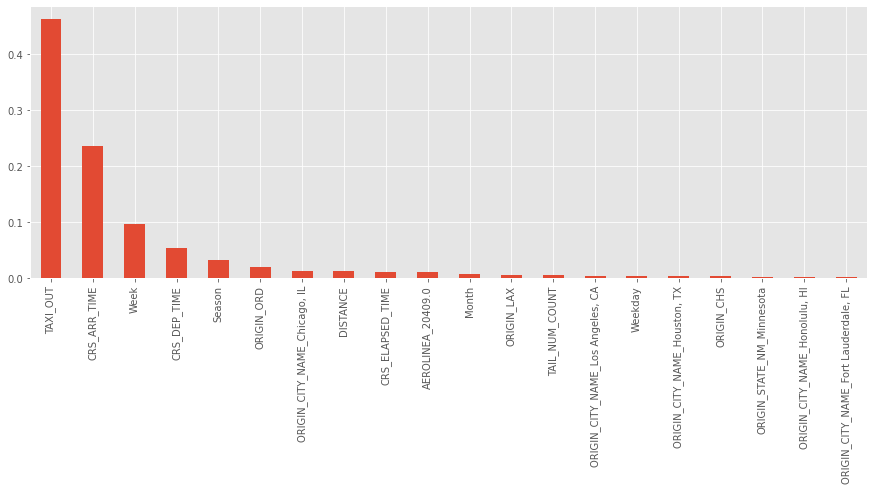

In [ ]:
plt.figure(figsize=(15,5))
top_features.plot(kind='bar')

Podemos comprobar que la precisión obtenida por el RF es superior a la del árbol individual. 

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_split=500, random_state=42)
rf.fit(X_train, np.ravel(y_train))

RandomForestClassifier(max_depth=8, min_samples_split=500, random_state=42)

In [ ]:
y_score = pd.DataFrame(rf.predict_proba(X_test)[:,1], index=y_test.index, columns=['DelayScore'])

In [ ]:
results_df = y_test.join(y_score)

In [ ]:
results_df.head(10)

,ARR_DEL15,DelayScore
5,0.00,0.16
15,0.00,0.16
26,0.00,0.17
28,1.00,0.15
36,1.00,0.23
37,0.00,0.29
45,0.00,0.21
50,1.00,0.44
55,0.00,0.20
56,0.00,0.22


In [ ]:
print(metrics.roc_auc_score(results_df['ARR_DEL15'], results_df['DelayScore']))

0.7130688692723648


In [ ]:
fpr, tpr, _ = metrics.roc_curve(results_df['ARR_DEL15'], results_df['DelayScore'])

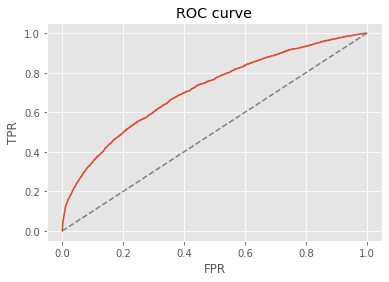

In [ ]:
plt.clf()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

Un aspecto importante a tener en cuenta es que el valor de score obtenido es un valor CONTINUO, por lo que deberemos trabajar con deciles. 

In [ ]:
results_df['DelayScore'].nunique()

18320

In [ ]:
pd.qcut?

In [ ]:
results_df['Decile'] = pd.qcut(results_df['DelayScore'], q=10)

In [ ]:
results_df.head(10)

,ARR_DEL15,DelayScore,Decile
5,0.00,0.16,"(0.149, 0.163]"
15,0.00,0.16,"(0.163, 0.175]"
26,0.00,0.17,"(0.163, 0.175]"
28,1.00,0.15,"(0.149, 0.163]"
36,1.00,0.23,"(0.218, 0.234]"
37,0.00,0.29,"(0.289, 0.551]"
45,0.00,0.21,"(0.204, 0.218]"
50,1.00,0.44,"(0.289, 0.551]"
55,0.00,0.20,"(0.19, 0.204]"
56,0.00,0.22,"(0.218, 0.234]"


In [ ]:
results_summary_table = results_df.pivot_table(index='Decile', values='ARR_DEL15', aggfunc=[len, np.sum, np.mean]).sort_index(ascending=False)

In [ ]:
results_summary_table

,len,sum,mean
,ARR_DEL15,ARR_DEL15,ARR_DEL15
Decile,,,
"(0.289, 0.551]",1879,"1,049.00",0.56
"(0.257, 0.289]",1878,624.00,0.33
"(0.234, 0.257]",1878,484.00,0.26
"(0.218, 0.234]",1879,401.00,0.21
"(0.204, 0.218]",1878,359.00,0.19
"(0.19, 0.204]",1877,287.00,0.15
"(0.175, 0.19]",1880,274.00,0.15
"(0.163, 0.175]",1878,216.00,0.12


In [ ]:
results_summary_table.columns = ['Cases', 'Responses', 'Accuracy']

In [ ]:
results_summary_table

,Cases,Responses,Accuracy
Decile,,,
"(0.289, 0.551]",1879,"1,049.00",0.56
"(0.257, 0.289]",1878,624.00,0.33
"(0.234, 0.257]",1878,484.00,0.26
"(0.218, 0.234]",1879,401.00,0.21
"(0.204, 0.218]",1878,359.00,0.19
"(0.19, 0.204]",1877,287.00,0.15
"(0.175, 0.19]",1880,274.00,0.15
"(0.163, 0.175]",1878,216.00,0.12
"(0.149, 0.163]",1878,182.00,0.10


In [ ]:
results_summary_table['Pct. Cases'] = results_summary_table['Cases'] / results_summary_table['Cases'].sum()
results_summary_table['Pct. Responses'] = results_summary_table['Responses'] / results_summary_table['Responses'].sum()

In [ ]:
results_summary_table

,Cases,Responses,Accuracy,Pct. Cases,Pct. Responses
Decile,,,,,
"(0.289, 0.551]",1879,"1,049.00",0.56,0.10,0.26
"(0.257, 0.289]",1878,624.00,0.33,0.10,0.16
"(0.234, 0.257]",1878,484.00,0.26,0.10,0.12
"(0.218, 0.234]",1879,401.00,0.21,0.10,0.10
"(0.204, 0.218]",1878,359.00,0.19,0.10,0.09
"(0.19, 0.204]",1877,287.00,0.15,0.10,0.07
"(0.175, 0.19]",1880,274.00,0.15,0.10,0.07
"(0.163, 0.175]",1878,216.00,0.12,0.10,0.05
"(0.149, 0.163]",1878,182.00,0.10,0.10,0.05


In [ ]:
results_summary_table['Cum. Cases'] = results_summary_table['Cases'].cumsum()
results_summary_table['Cum. Responses'] = results_summary_table['Responses'].cumsum()

In [ ]:
results_summary_table

,Cases,Responses,Accuracy,Pct. Cases,Pct. Responses,Cum. Cases,Cum. Responses
Decile,,,,,,,
"(0.289, 0.551]",1879,"1,049.00",0.56,0.10,0.26,1879,"1,049.00"
"(0.257, 0.289]",1878,624.00,0.33,0.10,0.16,3757,"1,673.00"
"(0.234, 0.257]",1878,484.00,0.26,0.10,0.12,5635,"2,157.00"
"(0.218, 0.234]",1879,401.00,0.21,0.10,0.10,7514,"2,558.00"
"(0.204, 0.218]",1878,359.00,0.19,0.10,0.09,9392,"2,917.00"
"(0.19, 0.204]",1877,287.00,0.15,0.10,0.07,11269,"3,204.00"
"(0.175, 0.19]",1880,274.00,0.15,0.10,0.07,13149,"3,478.00"
"(0.163, 0.175]",1878,216.00,0.12,0.10,0.05,15027,"3,694.00"
"(0.149, 0.163]",1878,182.00,0.10,0.10,0.05,16905,"3,876.00"


In [ ]:
results_summary_table['Cum. Pct. Cases'] = results_summary_table['Pct. Cases'].cumsum()
results_summary_table['Cum. Pct. Responses'] = results_summary_table['Pct. Responses'].cumsum()

In [ ]:
results_summary_table

,Cases,Responses,Accuracy,Pct. Cases,Pct. Responses,Cum. Cases,Cum. Responses,Cum. Pct. Cases,Cum. Pct. Responses
Decile,,,,,,,,,
"(0.289, 0.551]",1879,"1,049.00",0.56,0.10,0.26,1879,"1,049.00",0.10,0.26
"(0.257, 0.289]",1878,624.00,0.33,0.10,0.16,3757,"1,673.00",0.20,0.42
"(0.234, 0.257]",1878,484.00,0.26,0.10,0.12,5635,"2,157.00",0.30,0.54
"(0.218, 0.234]",1879,401.00,0.21,0.10,0.10,7514,"2,558.00",0.40,0.64
"(0.204, 0.218]",1878,359.00,0.19,0.10,0.09,9392,"2,917.00",0.50,0.73
"(0.19, 0.204]",1877,287.00,0.15,0.10,0.07,11269,"3,204.00",0.60,0.80
"(0.175, 0.19]",1880,274.00,0.15,0.10,0.07,13149,"3,478.00",0.70,0.87
"(0.163, 0.175]",1878,216.00,0.12,0.10,0.05,15027,"3,694.00",0.80,0.92
"(0.149, 0.163]",1878,182.00,0.10,0.10,0.05,16905,"3,876.00",0.90,0.97


In [ ]:
def get_gain_table(model, X_test, y_test):
    y_score = pd.DataFrame(model.predict_proba(X_test)[:,1], index=y_test.index, columns=['Score'])
    results_df = y_test.join(y_score)
    results_df['Decile'] = pd.qcut(results_df['Score'], q=10)
    results_summary_table = results_df.pivot_table(index='Decile', values=y_test.columns, aggfunc=[len, np.sum, np.mean]).sort_index(ascending=False)
    results_summary_table.columns = ['Cases', 'Responses', 'Accuracy']
    results_summary_table['Pct. Cases'] = results_summary_table['Cases'] / results_summary_table['Cases'].sum()
    results_summary_table['Pct. Responses'] = results_summary_table['Responses'] / results_summary_table['Responses'].sum()
    results_summary_table['Cum. Cases'] = results_summary_table['Cases'].cumsum()
    results_summary_table['Cum. Responses'] = results_summary_table['Responses'].cumsum()
    results_summary_table['Cum. Pct. Cases'] = results_summary_table['Pct. Cases'].cumsum()
    results_summary_table['Cum. Pct. Responses'] = results_summary_table['Pct. Responses'].cumsum()
    return results_summary_table

In [ ]:
rf_results_summary_table = get_gain_table(rf, X_test, y_test)
rf_results_summary_table

,Cases,Responses,Accuracy,Pct. Cases,Pct. Responses,Cum. Cases,Cum. Responses,Cum. Pct. Cases,Cum. Pct. Responses
Decile,,,,,,,,,
"(0.289, 0.551]",1879,"1,049.00",0.56,0.10,0.26,1879,"1,049.00",0.10,0.26
"(0.257, 0.289]",1878,624.00,0.33,0.10,0.16,3757,"1,673.00",0.20,0.42
"(0.234, 0.257]",1878,484.00,0.26,0.10,0.12,5635,"2,157.00",0.30,0.54
"(0.218, 0.234]",1879,401.00,0.21,0.10,0.10,7514,"2,558.00",0.40,0.64
"(0.204, 0.218]",1878,359.00,0.19,0.10,0.09,9392,"2,917.00",0.50,0.73
"(0.19, 0.204]",1877,287.00,0.15,0.10,0.07,11269,"3,204.00",0.60,0.80
"(0.175, 0.19]",1880,274.00,0.15,0.10,0.07,13149,"3,478.00",0.70,0.87
"(0.163, 0.175]",1878,216.00,0.12,0.10,0.05,15027,"3,694.00",0.80,0.92
"(0.149, 0.163]",1878,182.00,0.10,0.10,0.05,16905,"3,876.00",0.90,0.97


In [ ]:
gb = GradientBoostingClassifier(n_estimators=50, max_depth=5, min_samples_split=500, random_state=42)
gb.fit(X_train, np.ravel(y_train))

GradientBoostingClassifier(max_depth=5, min_samples_split=500, n_estimators=50,
                           random_state=42)

In [ ]:
y_score = pd.DataFrame(gb.predict_proba(X_test)[:,1], index=y_test.index, columns=['DelayScore'])

In [ ]:
results_df = y_test.join(y_score)

In [ ]:
print(metrics.roc_auc_score(results_df['ARR_DEL15'], results_df['DelayScore']))

0.7459497520649429


In [ ]:
gb_results_summary_table = get_gain_table(gb, X_test, y_test)
gb_results_summary_table

,Cases,Responses,Accuracy,Pct. Cases,Pct. Responses,Cum. Cases,Cum. Responses,Cum. Pct. Cases,Cum. Pct. Responses
Decile,,,,,,,,,
"(0.394, 0.968]",1879,"1,186.00",0.63,0.10,0.30,1879,"1,186.00",0.10,0.30
"(0.285, 0.394]",1878,639.00,0.34,0.10,0.16,3757,"1,825.00",0.20,0.46
"(0.232, 0.285]",1878,497.00,0.26,0.10,0.12,5635,"2,322.00",0.30,0.58
"(0.199, 0.232]",1879,408.00,0.22,0.10,0.10,7514,"2,730.00",0.40,0.68
"(0.171, 0.199]",1878,322.00,0.17,0.10,0.08,9392,"3,052.00",0.50,0.76
"(0.147, 0.171]",1878,254.00,0.14,0.10,0.06,11270,"3,306.00",0.60,0.83
"(0.128, 0.147]",1879,261.00,0.14,0.10,0.07,13149,"3,567.00",0.70,0.89
"(0.108, 0.128]",1878,196.00,0.10,0.10,0.05,15027,"3,763.00",0.80,0.94
"(0.0886, 0.108]",1878,134.00,0.07,0.10,0.03,16905,"3,897.00",0.90,0.97


### Comparación de modelos

In [ ]:
RANDOM_STATE = 42
n_estimators = 50
max_depth = 5

models = [ 
    ('DecisionTree', DecisionTreeClassifier(max_depth=max_depth, random_state=42)),
    ('RandomForest', RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=RANDOM_STATE)),
    ('GradientBoosting', GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=RANDOM_STATE))
]

ROC AUC Score for DecisionTree: 0.6871240014870781
ROC AUC Score for RandomForest: 0.701823883958571
ROC AUC Score for GradientBoosting: 0.7450619907333845


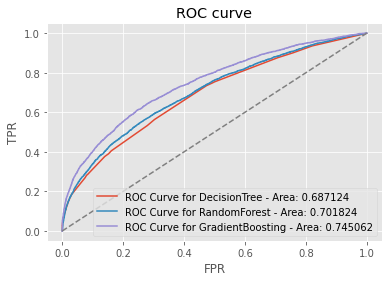

In [ ]:
plt.clf()
for model in models:
    model_name = model[0]
    model_instance = model[1]
    model_instance.fit(X_train, np.ravel(y_train))
    predictions = model_instance.predict_proba(X_test)[:,1]
    auc_score = metrics.roc_auc_score(y_test, predictions)
    print('ROC AUC Score for {}: {}'.format(model_name, auc_score))
    fpr, tpr, _ = metrics.roc_curve(y_test, predictions)
    plt.plot(fpr, tpr, label='ROC Curve for {} - Area: {:2f}'.format(model_name, auc_score))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.title('ROC curve')
plt.show()

In [ ]:
results_df.value_counts().sum()
df_matriz_confusion = results_df.rename(columns={'dif_pension_plan':'dif_pension_plan_valor_original',
                                                           'Prediction':'dif_pension_plan_valor_predicho'})
df_matriz_confusion.head(5)
TP = df_matriz_confusion.iloc[1,1]
TN = df_matriz_confusion.iloc[0,0]
FP = df_matriz_confusion.iloc[0,1]
FN = df_matriz_confusion.iloc[1,0]
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy